# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Загрузка данных из файла в датафрейм.

In [1]:
# Импорт необходимых библиотек
import pandas as pd  # Импортируем библиотеку pandas для работы с данными
import matplotlib.pyplot as plt  # Импортируем библиотеку matplotlib для визуализации
import warnings  # Импортируем библиотеку warnings для управления предупреждениями
import numpy as np  # Импортируем библиотеку numpy для работы с числами

# На этом этапе мы загрузили необходимые библиотеки для анализа данных и визуализации.

In [2]:
# Выводим информацию о версиях установленных библиотек
!pip show pandas matplotlib warnings numpy

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn, catboost
---
Name: matplotlib
Version: 3.3.4
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /opt/conda/lib/python3.9/site-packages
Requires: pyparsing, kiwisolver, cycler, pillow, numpy, python-dateutil
Required-by: seaborn, pyod, catboost
---
Name: numpy
Version: 1.21.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: 
Required-by: xgboost, transformers, thinc, tensorflo

In [3]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/data.csv'
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/real_estate_data.csv'
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'data'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

#### Изучение общей информации о полученном датафрейме.

In [4]:
# Устанавливаем опцию для отображения всех столбцов при выводе датафрейма.
pd.set_option('display.max_columns', None)

# Выводим первые 15 строк датафрейма на экран.
data.head(15)

# На этом этапе мы установили опцию для отображения всех столбцов датафрейма и вывели первые 15 строк датафрейма на экран.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#Получаю общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построение общей гистограммы для всех числовых столбцов таблицы.

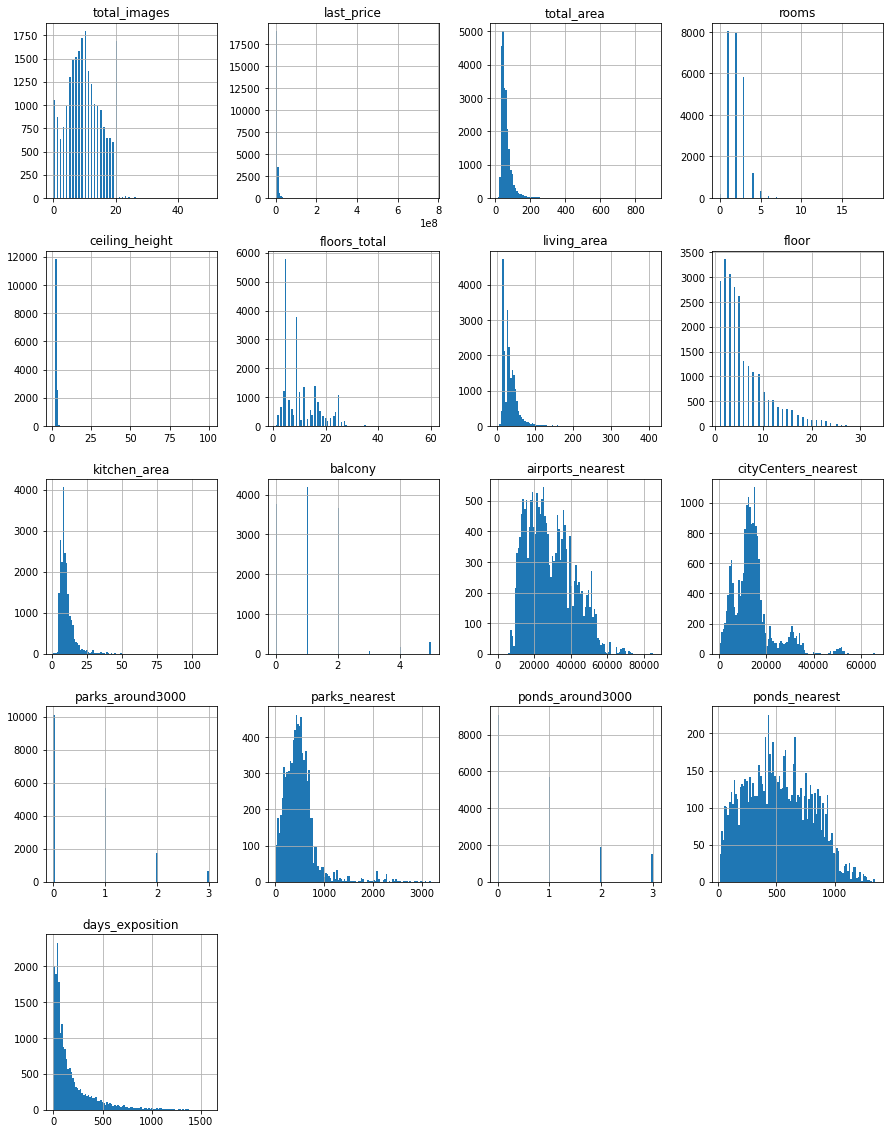

In [6]:
# Используем метод .hist() для построения гистограммы для всех числовых столбцов датафрейма.
data.hist(bins=100, figsize=(15, 20));

# bins=100 указывает на количество бинов (столбцов) на гистограмме.
# figsize=(15, 20) задает размер графика (ширина 15, высота 20).

# На этом этапе мы построили общую гистограмму для всех числовых столбцов таблицы.

In [7]:
# Используем метод .isna() для определения пропущенных значений в датафрейме, а затем метод .sum() для подсчета их количества.
missing_values = data.isna().sum()

# missing_values теперь содержит количество пропущенных значений в каждом столбце датафрейма.

# Мы вывели информацию о количестве пропущенных значений в каждом столбце датафрейма.
missing_values

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# Используем метод .describe() для получения основных статистических характеристик числовых столбцов датафрейма.
# Метод .round(1) округляет значения до одной десятой.
statistics = data.describe().round(1)

# statistics теперь содержит основные статистические характеристики числовых столбцов.

# Выводим полученные статистические характеристики на экран.
statistics

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,9.9,6541548.8,60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,28793.7,14191.3,0.6,490.8,0.8,518.0,180.9
std,5.7,10887013.3,35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,12630.9,8608.4,0.8,342.3,0.9,277.7,219.7
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,26726.0,13098.5,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


In [9]:
# Используем метод .isnull() для создания булевого датафрейма, который указывает на пропущенные значения (True) в датафрейме data.
# Затем используем метод .sum() для подсчета количества пропусков в каждом столбце.
null_counts = data.isnull().sum()

# Создаем переменную num_cols_with_nulls, в которой подсчитываем количество столбцов с пропусками (столбцы, в которых есть хотя бы один пропуск).
num_cols_with_nulls = (null_counts > 0).sum()

# Получаем общее количество столбцов в датафрейме data.
num_columns = data.shape[1]

# Рассчитываем долю столбцов с пропусками в процентах и округляем до двух десятых.
percentage_columns_with_nulls = ((num_cols_with_nulls / num_columns) * 100).round(2)

# Выводим на экран долю столбцов с пропусками.
print(f'Доля столбцов с пропусками: {percentage_columns_with_nulls}%')

# На этом этапе мы подсчитали количество пропусков в каждом столбце и определили долю столбцов с пропусками в датафрейме.

Доля столбцов с пропусками: 63.64%


Изученные данные показали наличие несколько проблем, таких как пропуски, дубликаты, неверный тип данных и странные (аномальные) значения.

1. Пропуски могут негативно повлиять на анализ данных, если их количество значительно. Их необходимо заполнить, чтобы не потерять ценную информацию.

2. Дубликаты могут исказить статистические характеристики данных и ведут к неправильным выводам.

3. Неверный тип данных может привести к трудностям при выполнении математических операций и других анализов.

4. Странные (аномальные) значения могут быть результатом ошибок ввода данных или же являться некорректными значениями, которые не могут быть объяснены с помощью имеющихся знаний о предметной области. Они также могут быть следствием ошибок при сборе данных.

### Предобработка данных

#### Нахождение и изучение пропущенных значений в столбцах:

##### Определение в каких столбцах есть пропуски.

In [10]:
# Используем метод .isnull().any() для определения, в каких столбцах датафрейма есть хотя бы один пропуск.
# Этот метод возвращает булев сериес, где True указывает на наличие пропусков в соответствующем столбце.
# data.isnull().any() возвращает такую сериес.

# Чтобы получить имена столбцов, в которых есть пропуски, используем метод data.columns.
# Мы применяем метод .isnull().any() к каждому столбцу и получаем список столбцов с пропусками.
columns_with_nulls = data.columns[data.isnull().any()]

# Теперь в переменной columns_with_nulls у нас есть список столбцов, в которых есть пропуски.

# Выводим на экран этот список столбцов.
print(columns_with_nulls)

# На этом этапе мы определили, в каких столбцах датафрейма есть пропуски, и вывели список этих столбцов на экран.

Index(['ceiling_height', 'floors_total', 'living_area', 'is_apartment',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')


In [11]:
# Используем метод .isna() для определения пропущенных значений в датафрейме, а затем метод .sum() для подсчета их количества.
missing_values = data.isna().sum()

# missing_values теперь содержит количество пропущенных значений в каждом столбце датафрейма.

# Выводим количество пропущенных значений для каждого столбца на экран.
print(missing_values)

# На этом этапе мы подсчитали количество пропущенных значений в каждом столбце датафрейма и вывели результат на экран.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


##### Заполнение пропущенных значений там, где это возможно.

Убираем пропущенные значения в столбце "balcony" заменяя их на ноль.

In [12]:
# Используем метод .fillna() для замены пропусков в столбце "balcony" на нулевые значения (0).
# Параметр inplace=True означает, что изменения выполняются в самом датафрейме data, а не создается новый датафрейм.
data['balcony'].fillna(value=0, inplace=True)

# Теперь столбец "balcony" не содержит пропусков, так как мы заменили их на нулевые значения.

# Используем метод .isnull().any() для проверки, содержит ли столбец "balcony" пропуски (должен вернуть False).
has_nulls = data['balcony'].isnull().any()

# Выводим результат проверки на экран.
print(has_nulls)

# На этом этапе мы успешно заменили пропуски в столбце "balcony" на нулевые значения и проверили, что столбец больше не содержит пропусков.

False


Убираем пропущенные значения в столбце "is_apartment" заменяя их на "False".

In [13]:
# Используем метод .fillna() для замены пропусков в столбце "is_apartment" на значение False.
# Параметр inplace=True означает, что изменения выполняются в самом датафрейме data, а не создается новый датафрейм.
data['is_apartment'].fillna(value=False, inplace=True)

# Теперь столбец "is_apartment" не содержит пропусков, так как мы заменили их на значение False.

# Используем метод .isnull().any() для проверки, содержит ли столбец "is_apartment" пропуски (должен вернуть False).
has_nulls = data['is_apartment'].isnull().any()

# Выводим результат проверки на экран.
print(has_nulls)

# На этом этапе мы успешно заменили пропуски в столбце "is_apartment" на значение False и проверили, что столбец больше не содержит пропусков.

False


Убираем пропущенные значения в столбце "ceiling_height" заменяя их значением 2.5 м в соответсвии с СНиП 23-01-99.

In [14]:
# Используем метод .fillna() для замены пропусков в столбце "ceiling_height" на значение 2.5 метра.
# Параметр inplace=True означает, что изменения выполняются в самом датафрейме data, а не создается новый датафрейм.
data['ceiling_height'].fillna(value=2.5, inplace=True)

# Теперь столбец "ceiling_height" не содержит пропусков, так как мы заменили их на значение 2.5 метра.

# Используем метод .isnull().any() для проверки, содержит ли столбец "ceiling_height" пропуски (должен вернуть False).
has_nulls = data['ceiling_height'].isnull().any()

# Выводим результат проверки на экран.
print(has_nulls)

# На этом этапе мы успешно заменили пропуски в столбце "ceiling_height" на значение 2.5 метра и проверили, что столбец больше не содержит пропусков.

False


Убираем дубликаты из столбца "название населённого пункта" путем приведения всех записей к единому стилю нижнего регистра, а также устранения неявных дубликатов. Данное действие нам необходимо не только для решения текущей задачи приведения в порядок самого столбца с данными, но для наведения порядка в других.

In [15]:
# Используем метод .nunique() для подсчета количества уникальных значений в столбце "locality_name".
unique_localities = data['locality_name'].nunique()

# unique_localities теперь содержит количество уникальных значений в столбце "locality_name".

# Выводим количество уникальных значений на экран.
print(unique_localities)

# На этом этапе мы успешно подсчитали количество уникальных значений в столбце "locality_name" и вывели результат на экран.

364


In [16]:
# Приводим все значения в столбце "locality_name" к нижнему регистру с помощью метода .str.lower().
data['locality_name'] = data['locality_name'].str.lower()

# Создаем функцию для замены неявных дубликатов в значениях столбца "locality_name".
def replace_dict_name(text):
    
    # Создаем словарь для замены неявных дубликатов. Например, "посёлок" заменяется на "поселок".
    replace_dict = {'посёлок': 'поселок', 
                    'село ': 'поселок ', 
                    'городской поселок': 'поселок',  
                    'поселок городского типа': 'поселок',  
                    'коттеджный поселок': 'поселок',  
                    'поселок станции': 'поселок при железнодорожной станции', 
                    'садоводческое некоммерческое товарищество': 'садовое товарищество', 
                    'поселок никольское': 'никольское', 
                    'поселок мурино': 'мурино', 
                    'деревня кудрово': 'кудрово', 
                    'поселок любань': 'любань'
                   }

    # Итерируемся по словарю и заменяем соответствующие значения в тексте.
    for key, value in replace_dict.items():
        text = str(text).replace(key, value)
        
    return text

# Применяем созданную функцию к столбцу "locality_name" с помощью метода .apply().
data['locality_name'] = data['locality_name'].apply(replace_dict_name)

# На этом этапе мы привели значения в столбце "locality_name" к нижнему регистру и заменили неявные дубликаты в значениях с помощью созданной функции.

In [17]:
# Используем метод .nunique() для подсчета количества уникальных значений в столбце "locality_name".
unique_localities = data['locality_name'].nunique()

# unique_localities теперь содержит количество уникальных значений в столбце "locality_name" после применения функции.

# Выводим количество уникальных значений на экран, чтобы убедиться, что функция успешно устранила дубликаты.
print(unique_localities)

# На этом этапе мы проверили количество уникальных значений в столбце "locality_name" и убедились, что функция успешно устранила дубликаты.

315


Заменяем пропуски в столбце "жилая площадь в квадратных метрах (м²)" на медианное значение там где это возможно.

In [18]:
with warnings.catch_warnings(): #Данная конструкция призвана убрать предупреждение типа "RuntimeWarning: Mean of empty slice"
    warnings.simplefilter("ignore", category=RuntimeWarning)
    # уникальные значения по столбцу "число комнат"
    col1_values = data['rooms'].unique()
    # уникальные значения по столбцу "название населённого пункта"
    col2_values = data['locality_name'].unique()
    
    for col1_val in col1_values:
        for col2_val in col2_values:

            # фильтр по значениям столбцов
            filter_ = (data['rooms'] == col1_val) & (data['locality_name'] == col2_val)

            # медианное значение столбца жилая площадь в квадратных метрах (м²)
            median_value = data.loc[filter_, 'living_area'].median()

            # заменяем пустые значения в столбце жилая площадь в квадратных метрах (м²) медианным значением
            data.loc[filter_ & data['living_area'].isnull(), 'living_area'] = median_value
            
            
data['living_area'].fillna(data['total_area'] * 0.7, inplace=True) # остатки заполняем значением равным 70%* от всей площади кв.
# *В общем случае, жилая площадь квартиры составляет от 50% до 90% от общей площади. Однако, есть квартиры с очень большой кухней 
# или просторной прихожей, которые могут снизить долю жилой площади. Мы же возьмем среднее значение равное 70%.

Заменяем пропуски в столбце "площадь кухни в квадратных метрах (м²)" на медианное значение там где это возможно.

In [19]:
with warnings.catch_warnings(): #Данная конструкция призвана убрать предупреждение типа "RuntimeWarning: Mean of empty slice"
    warnings.simplefilter("ignore", category=RuntimeWarning)
    
    # уникальные значения по столбцу "число комнат"
    col1_values = data['rooms'].unique()
    # уникальные значения по столбцу "название населённого пункта"
    col2_values = data['locality_name'].unique()
    
    for col1_val in col1_values:
        for col2_val in col2_values:

            # фильтр по значениям столбцов
            filter_ = (data['rooms'] == col1_val) & (data['locality_name'] == col2_val)

            # медианное значение столбца col3
            median_value = data.loc[filter_, 'kitchen_area'].median()

            # заменяем пустые значения в столбце col3 медианным значением
            data.loc[filter_ & data['kitchen_area'].isnull(), 'kitchen_area'] = median_value
            

data['kitchen_area'].fillna(data['total_area'] * 0.16, inplace=True) # остатки заполняем значением равным 16%* от всей площади кв.
# Доля площади кухни в квартире также зависит от конкретной квартиры и ее планировки. Обычно, площадь кухни составляет от 8% 
# до 25% от общей площади квартиры. В некоторых случаях, площадь кухни может быть больше, особенно если это просторная квартира 
# или квартира с отдельной кухней. Однако, если кухня маленькая или объединена с другой комнатой, то доля ее площади может быть 
# меньше. Мы же возьмем среднее значение равное 16%.

Учитывая, что для столбца максимальная этажность пропуски востановить нет возможности, то мы их удаляем.

In [20]:
# Используем метод .dropna() для удаления строк, в которых есть пропуски в столбце "floors_total".
# Параметр inplace=True означает, что изменения выполняются в самом датафрейме data, а не создается новый датафрейм.
data.dropna(subset=['floors_total'], inplace=True)

# Теперь строки с пропусками в столбце "floors_total" удалены из датафрейма.

# Используем метод .isnull().any() для проверки, содержит ли столбец "floors_total" пропуски (должен вернуть False).
has_nulls = data['floors_total'].isnull().any()

# Выводим результат проверки на экран.
print(has_nulls)

# На этом этапе мы успешно удалили строки с пропусками в столбце "floors_total" и проверили, что столбец больше не содержит пропусков.

False


Проверяем и убеждаемся, что все заполнено и пропусков в таблице больше нет.

In [21]:
data.isna().sum() # проверяем заполнение таблицы и убеждемся, что пропусков больше нет

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

##### В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

Существует множество причин, почему данные могут быть пропущены:

1. Ошибки человека при вводе данных, например, пропуск данных в анкете или опроснике, ошибки при переносе данных из бумажного носителя в электронный формат.

2. Технические ошибки при передаче данных, например, потеря данных при передаче по сети.

3. Несовершенство систем сбора данных, например, датчики могут выходить из строя, а даты и время могут быть неправильно записаны.

4. Недоступность некоторых данных. Некоторые данные могут быть недоступны в силу ограничений конфиденциальности или законодательства.

5. Причины, связанные с природой самих данных, например, если определенные атрибуты не применимы к некоторым объектам.

6. Отсутствие значений может быть специально установлено, чтобы указать на неизвестность данных или какую-то особенность.

7. Пропущенные значения могут также возникать в результате случайного сбоя или ошибки в хранении или обработке данных.

Важно понимать, что пропуски в данных могут существенно повлиять на качество анализа и прогнозирования!

#### Рассмотрение типов данных в каждом столбце:

##### Найдите столбцы, в которых нужно изменить тип данных.

In [22]:
# Используем метод .head() для вывода первых нескольких строк датафрейма data.
data.head()

# На этом этапе мы просто выводим на экран первые строки датафрейма для визуальной проверки результата удаления строк с пропусками.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.50,11.0,18.60,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.50,5.0,34.30,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.50,14.0,45.76,9,False,False,False,10.0,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [23]:
# Используем метод .dtypes для получения информации о типах данных в каждом столбце датафрейма.
data.dtypes

# На этом этапе мы просто выводим на экран типы данных для каждого столбца в датафрейме для анализа структуры данных.

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Очевидно что в столбце - всего этажей в доме ("floors_total") должны быть только целочисленные значения, аналогичная ситуация со столбцами число балконов ("balcony"), число парков в радиусе 3 км ("parks_around3000"), число водоёмов в радиусе 3 км ("ponds_around3000"), сколько дней было размещено объявление (от публикации до снятия) ("days_exposition"). Также считаю целесообразным в переводе типа данных столбца дата публикации ("first_day_exposition") из object в datetime64[ns]

##### Преобразуйте тип данных в выбранных столбцах.

Преобразуем тип данных в указанных столбцах на нужный

In [24]:
# Преобразуем столбец 'floors_total' в тип данных int
data['floors_total'] = data['floors_total'].astype(int)

# Преобразуем столбец 'balcony' в тип данных int
data['balcony'] = data['balcony'].astype(int)

# Преобразуем столбец 'first_day_exposition' в формат datetime, учитывая текущий формат даты и времени.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
# Преобразуем столбцы 'parks_around3000', 'ponds_around3000' и 'days_exposition' в тип int.
# Мы используем параметр errors='ignore', чтобы избежать ошибок преобразования для некорректных значений.
data[['parks_around3000', 
      'ponds_around3000', 
      'days_exposition']] = data[['parks_around3000', 
                                  'ponds_around3000', 
                                  'days_exposition']].astype(int, errors='ignore')

In [26]:
# Преобразуем указанные столбцы в тип данных float32.
# Мы используем параметр errors='ignore', чтобы избежать ошибок преобразования для некорректных значений.
# Также округляем значения до одного знака после запятой с помощью метода round(1).
data[['last_price', 
      'total_area', 
      'ceiling_height', 
      'living_area', 
      'kitchen_area', 
      'airports_nearest', 
      'cityCenters_nearest', 
      'parks_nearest', 
      'ponds_nearest']] = data[['last_price', 
                                'total_area', 
                                'ceiling_height', 
                                'living_area', 
                                'kitchen_area',
                                'airports_nearest',
                                'cityCenters_nearest', 
                                'parks_nearest',
                                'ponds_nearest']].astype('float32', errors='ignore').round(1)

In [27]:
#Посмотрим как изменились типы данных в таблице
data.dtypes

total_images                     int64
last_price                     float32
total_area                     float32
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float32
floors_total                     int64
living_area                    float32
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float32
balcony                          int64
locality_name                   object
airports_nearest               float32
cityCenters_nearest            float32
parks_around3000               float64
parks_nearest                  float32
ponds_around3000               float64
ponds_nearest                  float32
days_exposition                float64
dtype: object

In [28]:
#Посмотрим данные в "живую"
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.000000,2019-03-07,3,2.7,16,51.000000,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.400002,2018-12-04,1,2.5,11,18.600000,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.000000,2015-08-20,2,2.5,5,34.299999,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.000000,2015-07-24,3,2.5,14,45.799999,9,False,False,False,10.0,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.000000,2018-06-19,2,3.0,14,32.000000,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


##### В ячейке с типом markdown поясните, почему нужно изменить тип данных.

Изменение типов данных в теории может быть полезным по нескольким причинам:

1. Экономия памяти: некоторые типы данных занимают меньше места в памяти, чем другие, поэтому перевод данных из одного типа в другой может сэкономить память.

2. Более точные результаты: некоторые типы данных могут предоставлять более точные результаты для определенных задач. Например, если столбец содержит числа с плавающей запятой, округление может привести к потере точности.

3. Совместимость с алгоритмами: некоторые алгоритмы могут требовать определенного типа данных для работы. Если тип данных не соответствует требованиям алгоритма, это может привести к ошибкам.

4. Удобство использования: некоторые типы данных могут быть удобнее для работы с данными. Например, если столбец содержит даты, перевод данных в формат даты может облегчить работу с этими данными, например, при фильтрации или сортировке.

5. Обеспечение совместимости с другими системами: некоторые системы или приложения могут требовать определенного типа данных для импорта или экспорта данных.

Изменение типов данных может помочь улучшить качество анализа и предоставить более точные и качественные результаты.

В нашем же случае это мера необходима для создания новых данных на основе уже имеющихся, успешного анализа и в целом наведения порядка в таблице.

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

Дубликаты из столбца "название населённого пункта" были убраны выше когда проводилась процедура замены пропусков.

#### Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.

In [29]:
# Шаг 1: Разделим значения столбца 'ceiling_height' в диапазоне от 25 до 40 на 10
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 40), 'ceiling_height'] /= 10

# Шаг 2: Установим значения столбца 'ceiling_height', которые больше 5, равными 2.8
data.loc[(data['ceiling_height'] > 5), 'ceiling_height'] = 2.8

# Шаг 3: Установим значения столбца 'ceiling_height', которые больше 0 и меньше 2.5, равными 2.5
data.loc[(data['ceiling_height'] > 0) & (data['ceiling_height'] < 2.5), 'ceiling_height'] = 2.5

# Выведем уникальные значения столбца 'ceiling_height' после всех преобразований
data['ceiling_height'].unique()

array([2.7 , 2.5 , 3.  , 2.6 , 2.8 , 2.9 , 3.2 , 3.4 , 4.2 , 3.5 , 3.3 ,
       4.  , 3.1 , 3.7 , 3.6 , 3.8 , 5.  , 4.1 , 4.7 , 3.9 , 4.8 , 4.5 ,
       4.4 , 4.3 , 4.6 , 2.75, 4.9 ], dtype=float32)

In [30]:
#Создаю новый датафрэйм для последующей обработки.
data_new = data.copy()

In [31]:
#получаю основные статистические характеристики
(data_new['last_price']/1000).describe().round(1)

count     23613.0
mean       6540.6
std       10901.7
min          12.2
25%        3400.0
50%        4650.0
75%        6799.0
max      763000.0
Name: last_price, dtype: float64

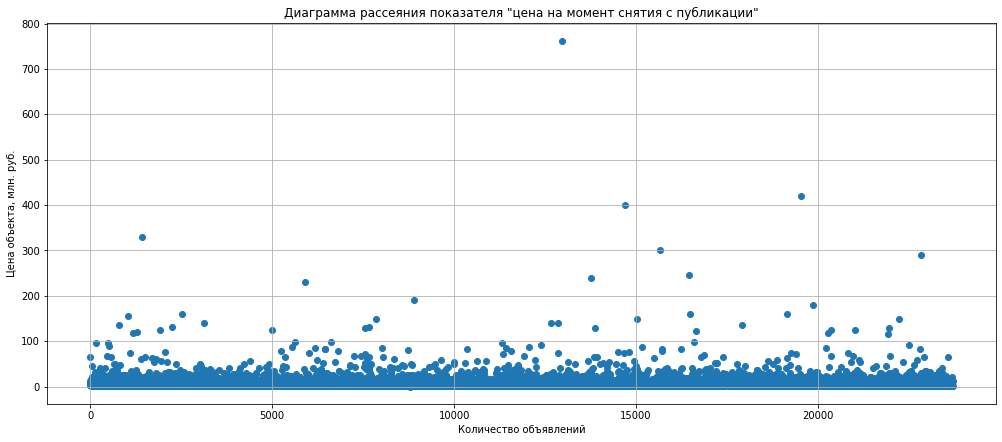

In [32]:
# Создаем новую фигуру (график) размером 17x7 дюймов
plt.figure(figsize=(17, 7))

# Включаем сетку на графике
plt.grid(True)

# Создаем точечную диаграмму рассеяния, где x - индексы данных, y - значения "last_price" (цены объектов), деленные на 1 миллион (для отображения в миллионах рублей)
plt.scatter(x=data_new.index, y=(data_new['last_price'])/1000000)

# Устанавливаем заголовок графика
plt.title('Диаграмма рассеяния показателя "цена на момент снятия с публикации"')

# Устанавливаем подпись оси x
plt.xlabel('Количество объявлений')

# Устанавливаем подпись оси y
plt.ylabel('Цена объекта, млн. руб.')

# Отображаем график
plt.show()

In [33]:
# Вычисляем первый и третий квартили (Q1 и Q3) для столбца 'last_price'
Q1 = data_new['last_price'].quantile(0.25)
Q3 = data_new['last_price'].quantile(0.75)

# Вычисляем интерквартильный размах (IQR)
IQR = Q3 - Q1

# Вычисляем нижнюю и верхнюю границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, оставляя только те, которые находятся в пределах нижней и верхней границы
data_new = data_new.loc[(data_new['last_price'] > lower_bound) & (data_new['last_price'] < upper_bound)]

# Выводим статистические характеристики для столбца 'last_price' после фильтрации
data_new['last_price'].describe().round(1)

count       21564.0
mean      4839129.0
std       2217291.8
min         12190.0
25%       3300000.0
50%       4400000.0
75%       6000000.0
max      11894400.0
Name: last_price, dtype: float64

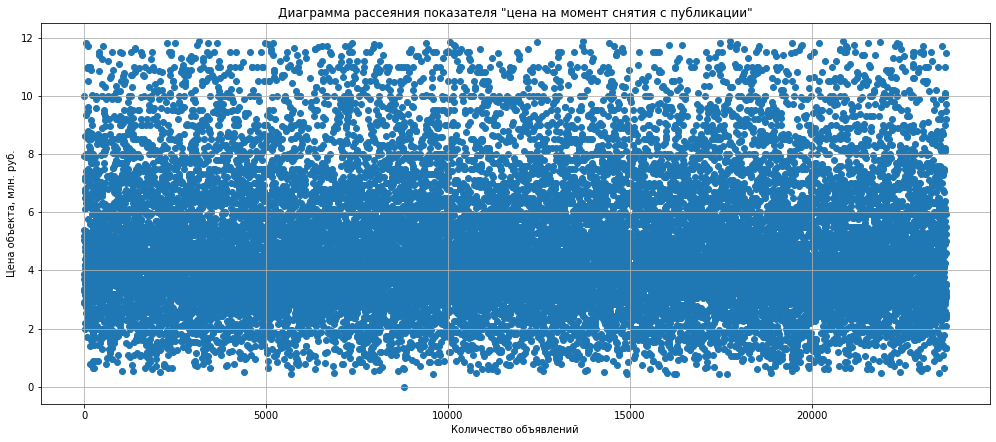

In [34]:
# Создаем новую фигуру для графика с указанием размера (17x7)
plt.figure(figsize=(17, 7))

# Включаем сетку на графике
plt.grid(True)

# Создаем диаграмму рассеяния (scatter plot), где x - индексы строк, y - значения 'last_price' в миллионах
plt.scatter(x=data_new.index, y=(data_new['last_price'])/1000000)

# Заголовок графика
plt.title('Диаграмма рассеяния показателя "цена на момент снятия с публикации"')

# Название оси x
plt.xlabel('Количество объявлений')

# Название оси y
plt.ylabel('Цена объекта, млн. руб.')

# Отображаем график
plt.show()

In [35]:
#получаю основные статистические характеристики
data_new['rooms'].describe().round(1)

count    21564.0
mean         1.9
std          0.9
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          7.0
Name: rooms, dtype: float64

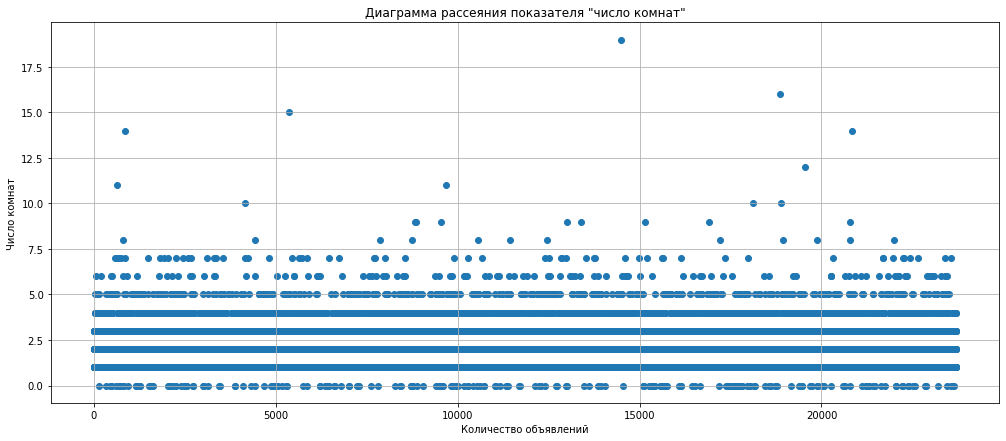

In [36]:
# Создаем новую фигуру для графика с указанием размера (17x7)
plt.figure(figsize=(17, 7))

# Включаем сетку на графике
plt.grid(True)

# Создаем диаграмму рассеяния (scatter plot), где x - индексы строк, y - значения 'rooms' (количество комнат)
plt.scatter(x=data.index, y=data['rooms'])

# Заголовок графика
plt.title('Диаграмма рассеяния показателя "число комнат"')

# Название оси x
plt.xlabel('Количество объявлений')

# Название оси y
plt.ylabel('Число комнат')

# Отображаем график
plt.show()

In [37]:
# Вычисляем первый квартиль (Q1) для столбца 'rooms'
Q1 = data_new['rooms'].quantile(0.25)

# Вычисляем третий квартиль (Q3) для столбца 'rooms'
Q3 = data_new['rooms'].quantile(0.75)

# Вычисляем межквартильный размах (IQR) как разницу между Q3 и Q1
IQR = Q3 - Q1

# Вычисляем нижнюю границу для определения выбросов
lower_bound = Q1 - 1.5 * IQR

# Вычисляем верхнюю границу для определения выбросов
upper_bound = Q3 + 1.5 * IQR

# Фильтруем DataFrame, оставляя только значения 'rooms', которые находятся внутри диапазона между lower_bound и upper_bound
data_new = data_new.loc[(data_new['rooms'] > lower_bound) & (data_new['rooms'] < upper_bound)]

# Выводим описательные статистики для столбца 'rooms' после удаления выбросов
data_new['rooms'].describe().round(1)

count    21547.0
mean         1.9
std          0.9
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          5.0
Name: rooms, dtype: float64

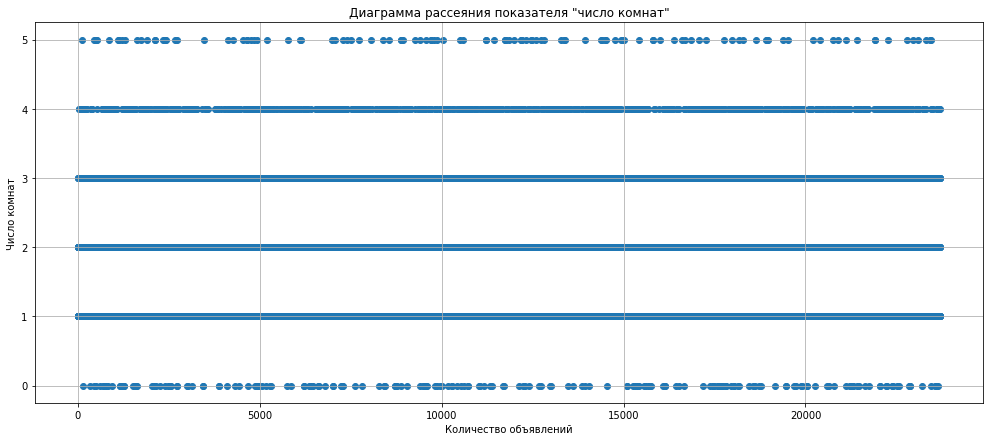

In [38]:
# Создаем график типа "scatter" с указанием размеров фигуры
plt.figure(figsize=(17, 7))

# Включаем сетку на графике
plt.grid(True)

# Создаем диаграмму рассеяния, где по оси X будут индексы объявлений, а по оси Y - значения из столбца 'rooms'
plt.scatter(x=data_new.index, y=data_new['rooms'])

# Заголовок графика
plt.title('Диаграмма рассеяния показателя "число комнат"')

# Название оси X
plt.xlabel('Количество объявлений')

# Название оси Y
plt.ylabel('Число комнат')

# Отображаем график
plt.show()

In [39]:
#получаю основные статистические характеристики
data_new['total_area'].describe().round(1)

count    21547.0
mean        53.2
std         18.9
min         12.0
25%         39.0
50%         49.1
75%         63.4
max        230.0
Name: total_area, dtype: float64

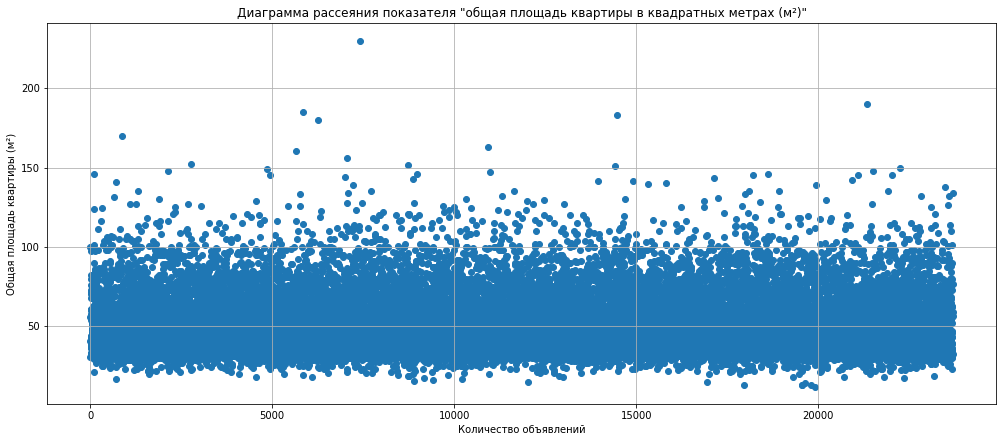

In [40]:
# Создаем график типа "scatter" с указанием размеров фигуры
plt.figure(figsize=(17, 7))

# Включаем сетку на графике
plt.grid(True)

# Создаем диаграмму рассеяния, где по оси X будут индексы объявлений, а по оси Y - значения из столбца 'total_area'
plt.scatter(x=data_new.index, y=data_new['total_area'])

# Заголовок графика
plt.title('Диаграмма рассеяния показателя "общая площадь квартиры в квадратных метрах (м²)"')

# Название оси X
plt.xlabel('Количество объявлений')

# Название оси Y
plt.ylabel('Общая площадь квартиры (м²)')

# Отображаем график
plt.show()

In [41]:
# Вычисляем первый и третий квартили (Q1 и Q3) для столбца 'total_area' в DataFrame 'data_new'
Q1 = data_new['total_area'].quantile(0.25)
Q3 = data_new['total_area'].quantile(0.75)

# Вычисляем интерквартильный размах (IQR)
IQR = Q3 - Q1

# Вычисляем нижнюю и верхнюю границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Оставляем только те строки в DataFrame 'data_new', где значения 'total_area' находятся в пределах нижней и верхней границ выбросов
data_new = data_new.loc[(data_new['total_area'] > lower_bound) & (data_new['total_area'] < upper_bound)]

# Выводим описательную статистику для столбца 'total_area' в DataFrame 'data_new'
data_new['total_area'].describe().round(1)

count    21076.0
mean        51.8
std         16.6
min         12.0
25%         38.9
50%         48.5
75%         62.3
max         99.9
Name: total_area, dtype: float64

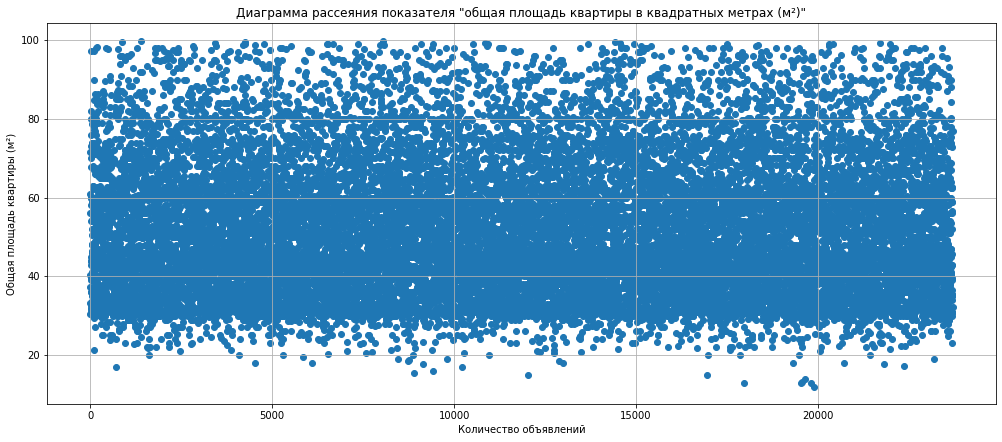

In [42]:
# Создаем новую фигуру для графика с заданными размерами (17x7 дюймов)
plt.figure(figsize=(17, 7))

# Включаем сетку на графике
plt.grid(True)

# Строим диаграмму рассеяния, где x - индексы строк в DataFrame 'data_new', y - значения столбца 'total_area' в 'data_new'
plt.scatter(x=data_new.index, y=data_new['total_area'])

# Задаем заголовок графика
plt.title('Диаграмма рассеяния показателя "общая площадь квартиры в квадратных метрах (м²)"')

# Задаем подписи для осей X и Y
plt.xlabel('Количество объявлений')
plt.ylabel('Общая площадь квартиры (м²)')

# Отображаем график
plt.show()

In [43]:
# Рассчитываем долю оставшихся данных после обработки
remaining_data_percentage = (data_new.shape[0] / data.shape[0]) * 100

# Округляем полученное значение до целых процентов
rounded_percentage = round(remaining_data_percentage, 0)

# Выводим сообщение с вычисленной долей оставшихся данных
print(f'Доля оставшихся данных после обработки: {rounded_percentage}%')

Доля оставшихся данных после обработки: 89.0%


In [44]:
# Выводим первые 5 строк нового датафрейма data_new
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.400002,2018-12-04,1,2.5,11,18.600000,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.000000,2015-08-20,2,2.5,5,34.299999,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.400000,2018-09-10,1,2.5,12,14.400000,5,False,False,False,9.1,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.299999,2017-11-02,1,2.5,26,10.600000,6,False,False,False,14.4,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.599998,2019-04-18,2,2.5,24,31.000000,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN


Считаю, что причиной аномалий в данных столбцах является человеческий фактор при запылении объявления.

### Посчитайте и добавьте в таблицу новые столбцы

#### Создаем столбец "цена одного квадратного метра". Результат округляем до двух знаков после запятой. 

In [45]:
# Вычисляем стоимость одного квадратного метра в квартире.
data_new['price_of_one_square_meter'] = (data_new['last_price'] / data_new['total_area']).round(2)

#### Создаем столбец "день недели публикации объявления".

In [46]:
# Извлекаем день недели публикации объявления.
data_new['day_of_the_publication_week'] = data_new['first_day_exposition'].dt.dayofweek

#### Создаем столбец "месяц публикации объявления".

In [47]:
# Извлекаем месяц публикации объявления.
data_new['month_of_publication'] = data_new['first_day_exposition'].dt.month

#### Создаем столбец "год публикации объявления".

In [48]:
# Извлекаем год публикации объявления.
data_new['year_of_publication'] = data_new['first_day_exposition'].dt.year

#### Создаем столбец "тип этажа квартиры".

In [49]:
# Устанавливаем значение "первый" в столбце "apartment_floor_type" для квартир на первом этаже.
data_new.loc[data_new['floor'] == 1, 'apartment_floor_type'] = 'первый'

# Устанавливаем значение "последний" в столбце "apartment_floor_type" для квартир на последнем этаже.
data_new.loc[data_new['floor'] == data_new['floors_total'], 'apartment_floor_type'] = 'последний'

# Устанавливаем значение "другой" в столбце "apartment_floor_type" для остальных этажей.
data_new.loc[(data_new['floor'] != 1) & (data_new['floor'] != data_new['floors_total']), 'apartment_floor_type'] = 'другой'

#### Создаем столбец расстояние до центра города в километрах

In [50]:
# Вычисляем расстояние до центра города в километрах и округляем до целых.
data_new['cityCenters_nearest_km'] = (data_new['cityCenters_nearest'] / 1000).round(0).astype(int, errors='ignore')

In [51]:
#Проверям что получилось
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_the_publication_week,month_of_publication,year_of_publication,apartment_floor_type,cityCenters_nearest_km
1,7,3350000.0,40.400002,2018-12-04,1,2.5,11,18.600000,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.5,5,34.299999,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой,14.0
5,10,2890000.0,30.400000,2018-09-10,1,2.5,12,14.400000,5,False,False,False,9.1,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062,0,9,2018,другой,NaN
6,6,3700000.0,37.299999,2017-11-02,1,2.5,26,10.600000,6,False,False,False,14.4,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938,3,11,2017,другой,19.0
7,5,7915000.0,71.599998,2019-04-18,2,2.5,24,31.000000,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.703125,3,4,2019,другой,12.0


### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:

##### общая площадь

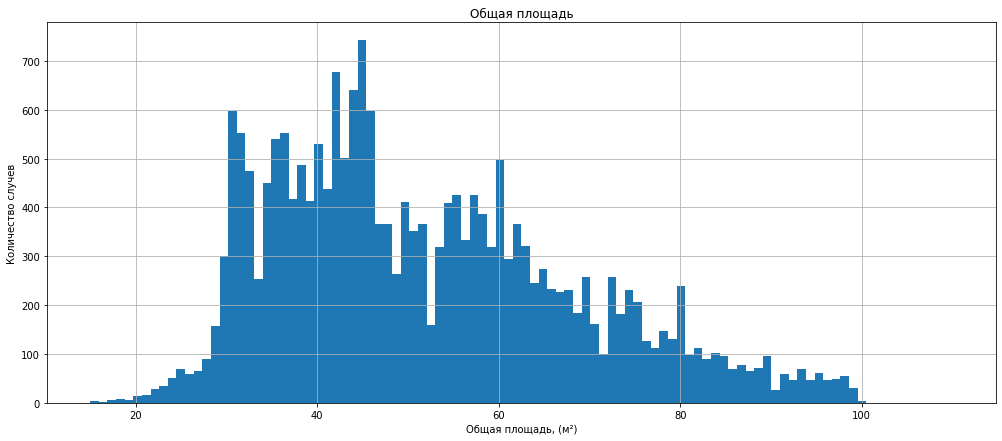

In [52]:
# Строим гистограмму общей площади с настройками.

data_new['total_area'].hist(bins=100, 
                        range=(15, 110), 
                        figsize=(17, 7), 
                        grid=True
                       )
plt.title('Общая площадь')
plt.xlabel('Общая площадь, (м²)')
plt.ylabel('Количество случев')
plt.show()

##### жилая площадь

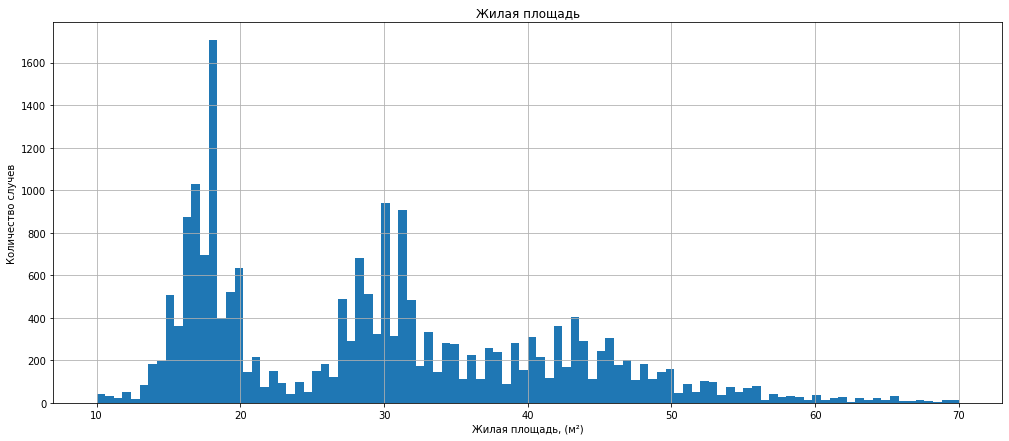

In [53]:
# Строим гистограмму жилой площади с настройками.

data_new['living_area'].hist(bins=100, 
                         range=(10, 70), 
                         figsize=(17, 7), 
                         grid=True
                        )
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь, (м²)')
plt.ylabel('Количество случев')
plt.show()

##### площадь кухни

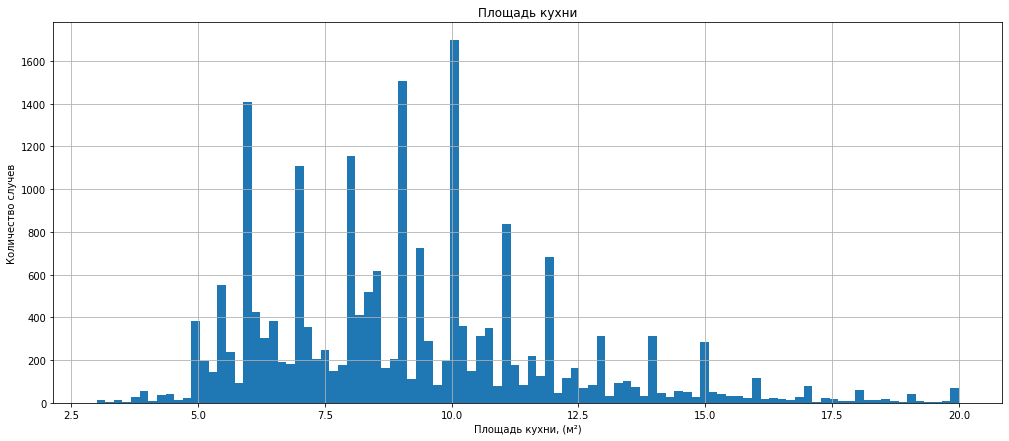

In [54]:
# Строим гистограмму площади кухни с настройками.

data_new['kitchen_area'].hist(bins=100, 
                          range=(3, 20), 
                          figsize=(17, 7), 
                          grid=True
                         )
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни, (м²)')
plt.ylabel('Количество случев')
plt.show()

##### цена объекта

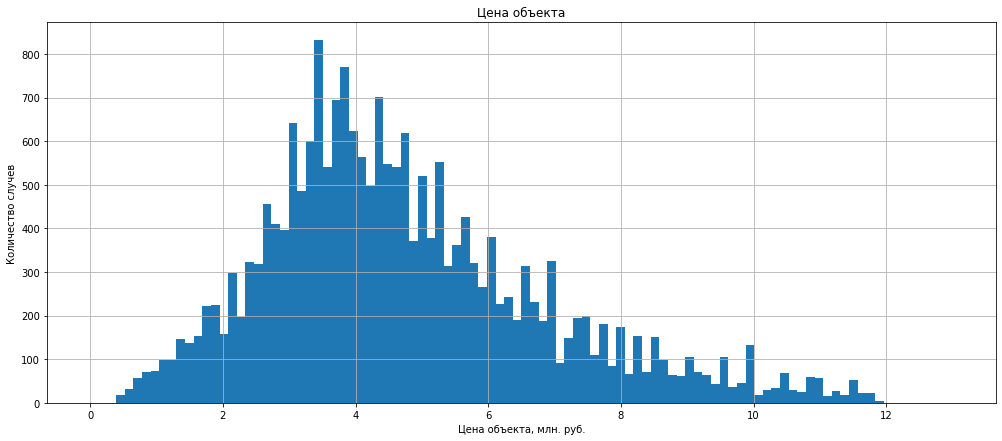

In [55]:
# Строим гистограмму цены объекта с настройками.

(data_new['last_price'] / 1000000).hist(bins=100, 
                                    range=(0, 13), 
                                    figsize=(17, 7), 
                                    grid=True
                                   )
plt.title('Цена объекта')
plt.xlabel('Цена объекта, млн. руб.')
plt.ylabel('Количество случев')
plt.show()

##### количество комнат

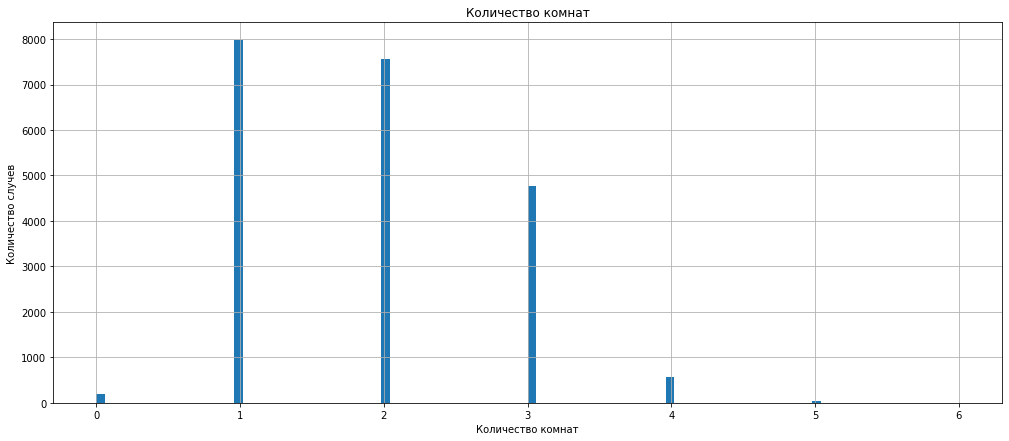

In [56]:
# Строим гистограмму количества комнат с настройками.    

data_new['rooms'].hist(bins=100, 
                   range=(0, 6), 
                   figsize=(17, 7), 
                   grid=True
                  )
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество случев')
plt.show()

##### высота потолков

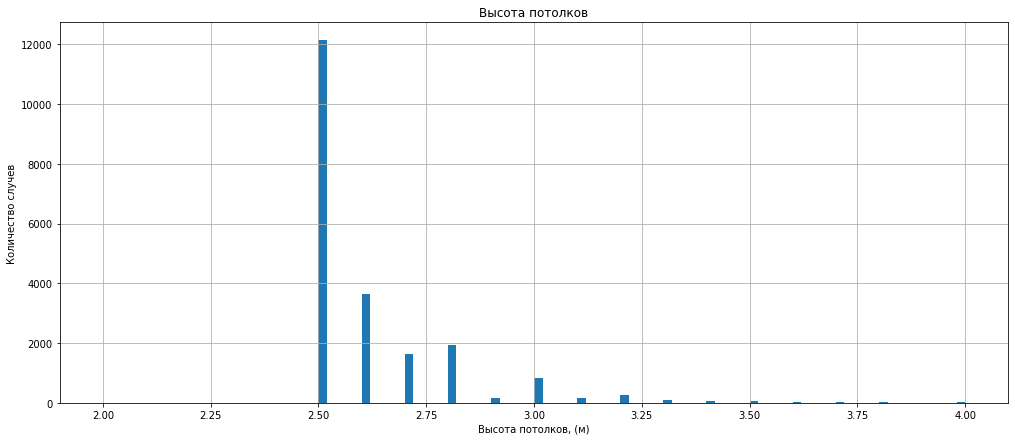

In [57]:
# Строим гистограмму высоты потолков с настройками.# Строим гистограмму высоты потолков с настройками.

data_new['ceiling_height'].hist(bins=100, 
                            range=(2, 4), 
                            figsize=(17, 7), 
                            grid=True
                           )
plt.title('Высота потолков')
plt.xlabel('Высота потолков, (м)')
plt.ylabel('Количество случев')
plt.show()

##### этаж квартиры

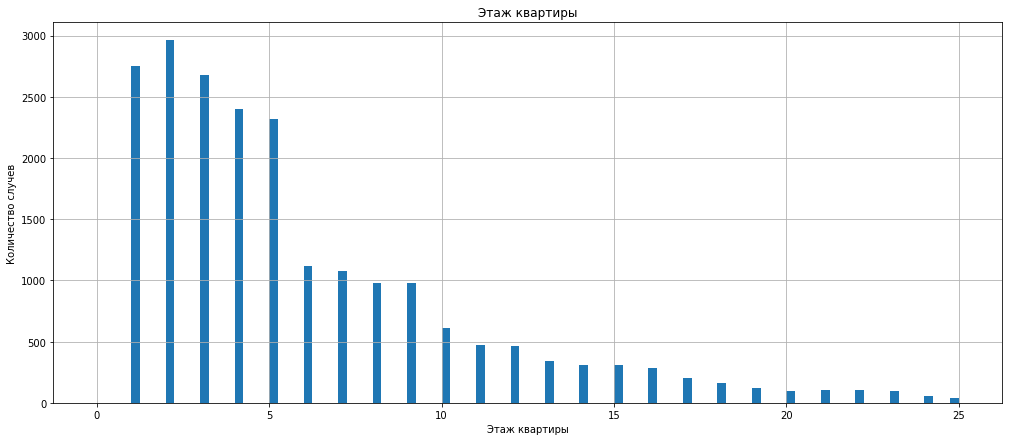

In [58]:
# Строим гистограмму этажей квартиры с настройками.

data_new['floor'].hist(bins=100, 
                   range=(0, 25),
                   figsize=(17, 7), 
                   grid=True
                  )
plt.title('Этаж квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество случев')
plt.show()

##### тип этажа квартиры («первый», «последний», «другой»);

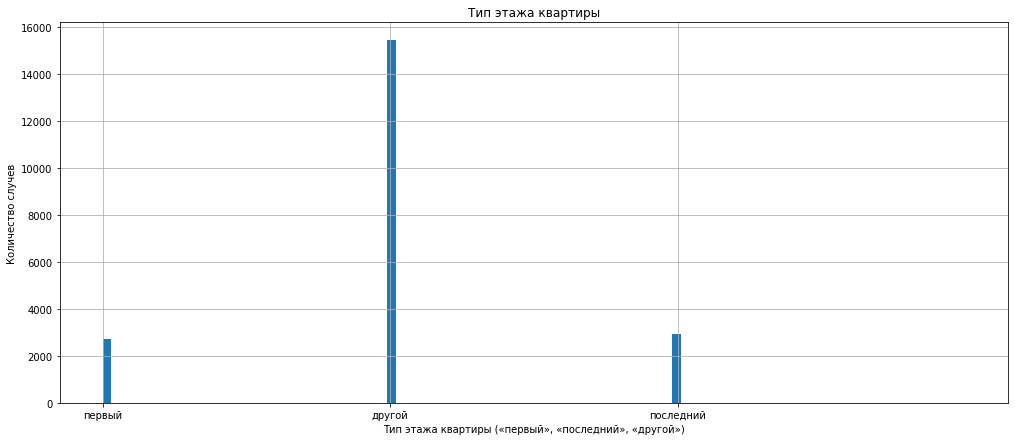

In [59]:
# Строим гистограмму типов этажей квартир с настройками.

data_new['apartment_floor_type'].hist(bins=100, 
                                  range=(0, 3), 
                                  figsize=(17, 7), 
                                  grid=True
                                 )
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа квартиры («первый», «последний», «другой»)')
plt.ylabel('Количество случев')
plt.show()

##### общее количество этажей в доме

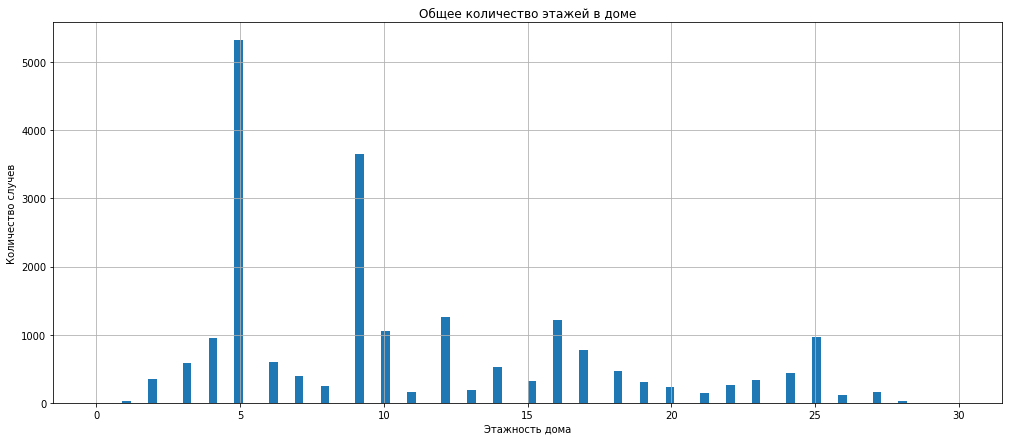

In [60]:
# Строим гистограмму общей этажности домов с настройками.

data_new['floors_total'].hist(bins=100, 
                          range=(0, 30), 
                          figsize=(17, 7), 
                          grid=True
                         )
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество случев')
plt.show()

##### расстояние до центра города в метрах;

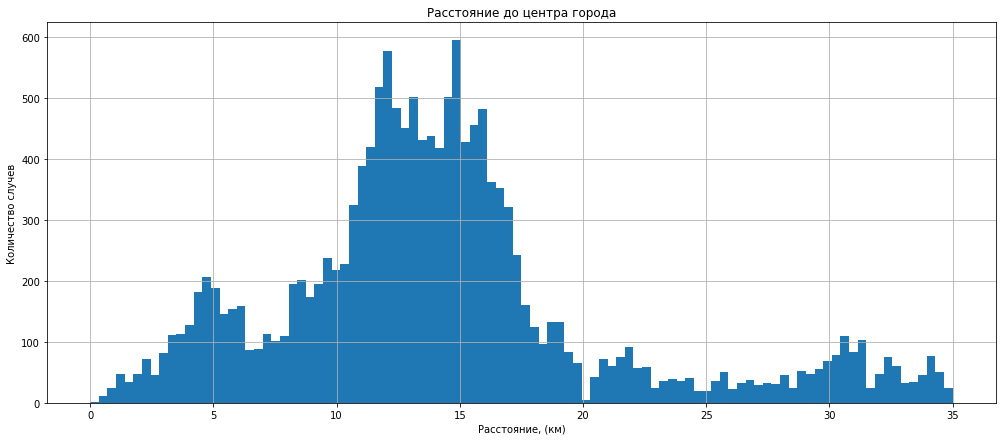

In [61]:
# Строим гистограмму расстояния до центра города в километрах с настройками.

(data_new['cityCenters_nearest']/1000).hist(bins=100, 
                                 range=(0, 35), 
                                 figsize=(17, 7), 
                                 grid=True
                                )
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние, (км)')
plt.ylabel('Количество случев')
plt.show()

##### расстояние до ближайшего аэропорта;

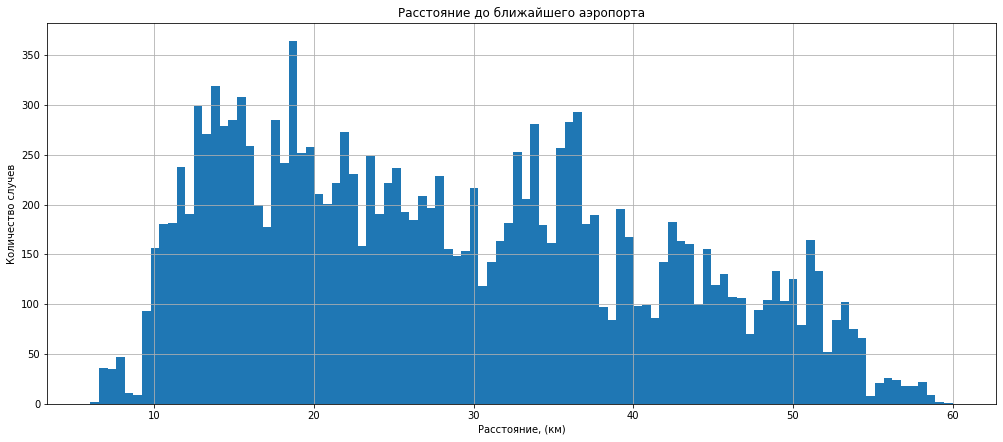

In [62]:
# Строим гистограмму расстояния до ближайшего аэропорта в километрах с настройками.

(data_new['airports_nearest']/1000).hist(bins=100, 
                              range=(6, 60), 
                              figsize=(17, 7), 
                              grid=True
                             )
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние, (км)')
plt.ylabel('Количество случев')
plt.show()

##### расстояние до ближайшего парка;

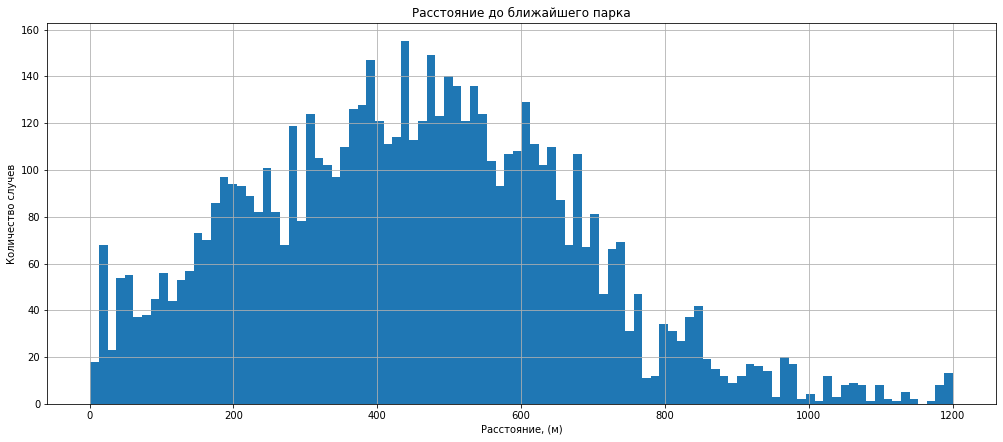

In [63]:
# Строим гистограмму расстояния до ближайшего парка в метрах с настройками.

data_new['parks_nearest'].hist(bins=100, 
                           range=(1, 1200), 
                           figsize=(17, 7), 
                           grid=True
                          )
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, (м)')
plt.ylabel('Количество случев')
plt.show()

##### месяц публикации объявления.

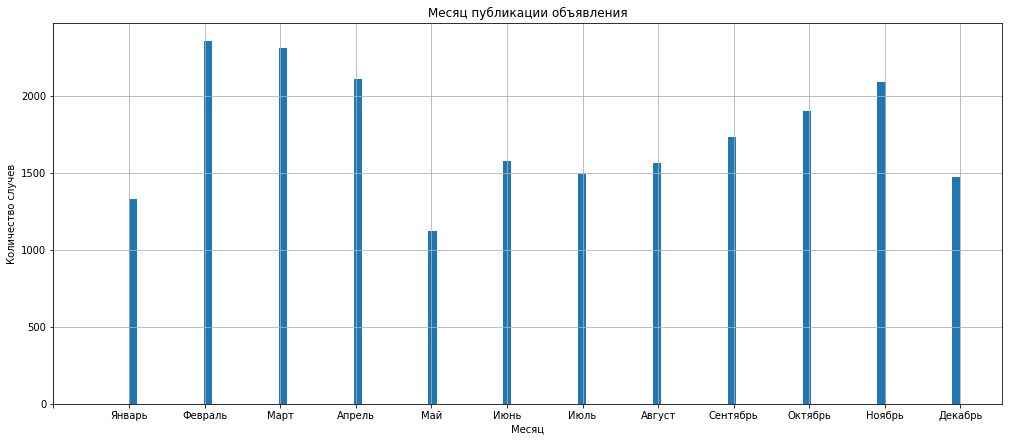

In [64]:
# Строим гистограмму месяца публикации объявления с настройками.

data_new['month_of_publication'].hist(bins=100, 
                           #range=(1, 12), 
                           figsize=(17, 7), 
                           grid=True
                          )
x_labels = ['','Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
plt.xticks(range(13), x_labels)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество случев')
plt.show()

##### день публикации объявления.

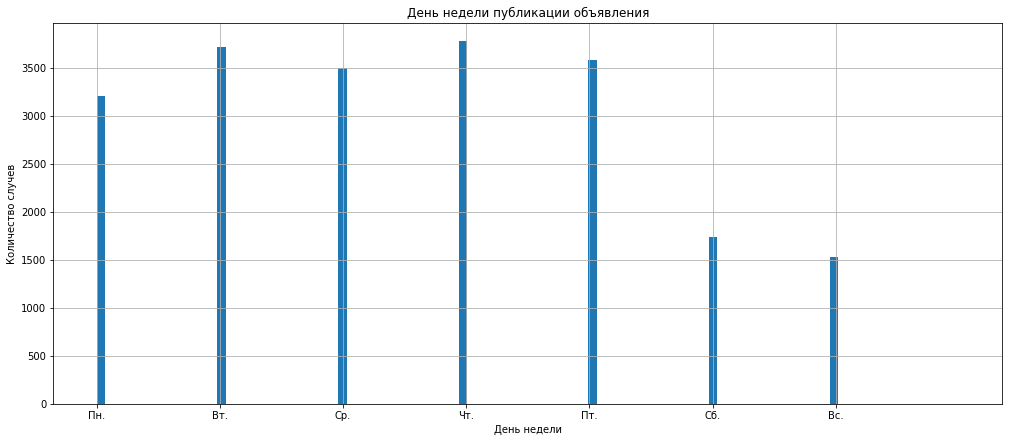

In [65]:
# Строим гистограмму дня недели публикации объявления с настройками.

data_new['day_of_the_publication_week'].hist(bins=100, 
                                         range=(0, 7), 
                                         figsize=(17, 7), 
                                         grid=True
                                        )
x_labels = ['Пн.', 'Вт.', 'Ср.', 'Чт.', 'Пт.', 'Сб.', 'Вс.']
plt.xticks(range(7), x_labels)
plt.title('День недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество случев')
plt.show()

##### Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

Исходя из построенных графиков можно отметить следующее:
1. В столбце "общая площадь" чаще всего встречаются квартиры с общей площадью от 30 до 70 метров; 
2. В столбце "жилая площадь" чаще всего встречаются квартиры с жилой площадью от 15 до 50 метров;
3. В столбце "площадь кухни" чаще всего встречаются квартиры с площадью кухни от 5 до 15 метров;
4. В столбце "цена объекта" чаще встречаются квартиры стоимостью от 2 до 6 млн. рублей;
5. В столбце "количество комнат" чаще встречаются квартиры с 1 комнатой, далее в рейтинге "двушки" и "трешки";
6. В столбце "высота потолков" чаще всего встречаются квартиры с высотой потолка 2,5 метра даже не смотря на добавление данных;
7. В столбце "этаж квартиры" чаще всего встречается квартиры, находящиеся с 1 по 5 этаж. 2 этаж самый популярный;
8. В столбце "тип этажа квартиры" доминирует тип "другой";
9. В столбце "общее количество этажей в доме" отчетливо видны 5-и и 9-и этажные дома и они составляют основную массу предложений;
10. В столбце "расстояние до центра города в метрах" отчетливо видно, что основная масса квартир продается в пределах 20 км от центра;
11. в столбце "расстояние до ближайшего аэропорта" отчетливо видно, что основная масса квартир продается в пределах от 10 до 55 км от аэропорта;
12. В столбце "расстояние до ближайшего парка" основная масса объявлений сосредоточена на расстоянии до 750 метров;
13. В столбце "месяц публикации объявления" отчетливо доминируют февраль, март, апрель и ноябрь;
14. В столбце "день публикации объявления" видно, что большая часть объявлений размещены с пн. по пт.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

##### Постройте гистограмму.

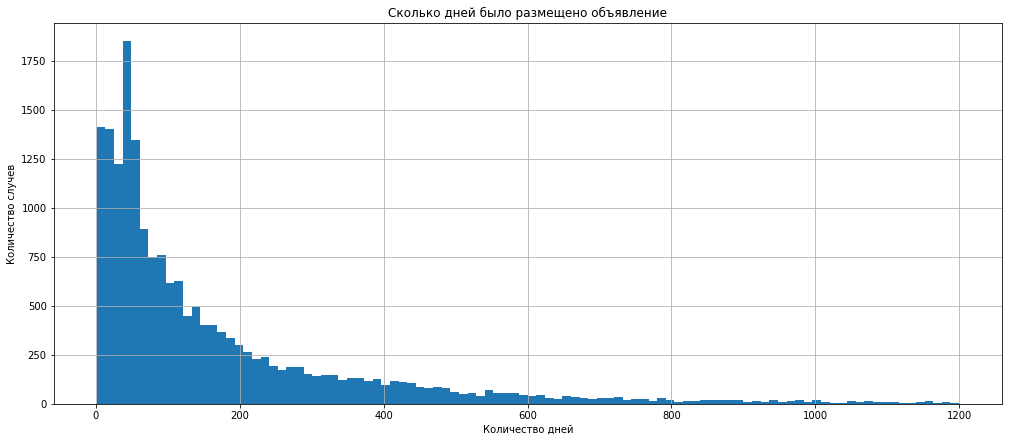

In [66]:
# Строим гистограмму количества дней размещения объявления с настройками.

data_new['days_exposition'].hist(bins=100, 
                             range=(1, 1200), 
                             figsize=(17, 7), 
                             grid=True,
                            )
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество случев')
plt.show()

In [67]:
# Среднее время продажи квартиры в разрезе лет (дн.)
data_new.groupby('year_of_publication')['days_exposition'].mean().round(2)

year_of_publication
2014    899.44
2015    631.06
2016    313.89
2017    153.58
2018     91.28
2019     30.66
Name: days_exposition, dtype: float64

##### Посчитайте среднее и медиану.

In [68]:
# Расчет среднего значения
mean_value = data_new['days_exposition'].mean().round(1)
print('Среднее значение равно', mean_value)

# Расчет медианы
median_value = round(data_new['days_exposition'].median(), 1)
print('Медианное значение равно', median_value)

Среднее значение равно 170.8
Медианное значение равно 90.0


##### В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

В среднем за рассмотренные годы квартира продавалась за 158 дней, но если анализировать по годам, то самые долгие продажи квартир тянуться с 2014, а самые быстрые в 2019 году.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [76]:
#Построим матрицу корреляции
data_new.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_the_publication_week,month_of_publication,year_of_publication,cityCenters_nearest_km
total_images,1.000000,0.167379,0.110358,0.081434,0.055905,0.011354,0.089699,0.032611,0.010485,-0.027872,-0.022286,0.058095,0.045823,-0.005238,-0.033934,0.002501,-0.013614,-0.024078,0.002482,-0.037192,0.122307,-0.007396,0.004547,0.146840,-0.033414
last_price,0.167379,1.000000,0.677554,0.406554,0.328161,0.210776,0.519329,0.146174,0.016071,-0.068921,-0.047709,0.461401,0.072387,-0.033367,-0.340903,0.106372,0.036244,0.139450,-0.052226,0.063865,0.652962,-0.012373,0.004562,0.014525,-0.341435
total_area,0.110358,0.677554,1.000000,0.798346,0.224862,-0.025432,0.890056,-0.031228,0.013290,-0.122824,-0.076018,0.389343,0.066049,-0.013084,-0.107545,0.045426,-0.000652,0.085371,-0.030765,0.099465,-0.071798,-0.007938,0.007272,-0.049374,-0.107779
rooms,0.081434,0.406554,0.798346,1.000000,0.072426,-0.240962,0.897395,-0.182197,-0.008727,-0.174287,-0.109442,0.023762,0.001271,-0.040984,-0.057783,0.048420,-0.051203,0.013735,-0.005145,0.071749,-0.231125,-0.001389,-0.003547,-0.026166,-0.057549
ceiling_height,0.055905,0.328161,0.224862,0.072426,1.000000,-0.049449,0.169011,-0.035380,0.070403,0.011179,-0.017983,0.219976,0.015293,-0.061354,-0.203334,0.160340,-0.071621,0.143192,-0.054999,0.062211,0.216584,-0.023318,-0.008398,0.035640,-0.203494
floors_total,0.011354,0.210776,-0.025432,-0.240962,-0.049449,1.000000,-0.190322,0.675981,-0.019262,0.072933,0.054762,0.320120,0.164092,0.096309,-0.030360,-0.238096,0.116841,-0.098894,0.021464,-0.040229,0.342021,0.010243,0.014436,-0.002237,-0.031134
living_area,0.089699,0.519329,0.890056,0.897395,0.169011,-0.190322,1.000000,-0.146747,0.007719,-0.075565,-0.045736,0.092865,0.022411,-0.043858,-0.089267,0.074192,-0.052547,0.052551,-0.013794,0.079214,-0.172748,-0.003074,-0.001351,-0.036840,-0.089258
floor,0.032611,0.146174,-0.031228,-0.182197,-0.035380,0.675981,-0.146747,1.000000,-0.012377,0.038041,0.039497,0.219904,0.163947,0.067307,-0.013214,-0.157740,0.085299,-0.063977,0.024578,-0.036271,0.249832,0.009630,0.019353,0.001071,-0.013763
is_apartment,0.010485,0.016071,0.013290,-0.008727,0.070403,-0.019262,0.007719,-0.012377,1.000000,-0.003296,-0.002186,0.024422,0.028745,0.020375,0.015242,-0.000811,-0.027851,0.005675,0.015749,-0.004635,0.013048,-0.009372,-0.010004,0.020079,0.015325
studio,-0.027872,-0.068921,-0.122824,-0.174287,0.011179,0.072933,-0.075565,0.038041,-0.003296,1.000000,-0.004594,-0.109089,0.033085,-0.023514,-0.014610,-0.028386,0.008443,0.006448,-0.002989,-0.020973,0.047087,-0.001137,-0.001418,0.010129,-0.015172


##### Зависит ли цена от общей площади

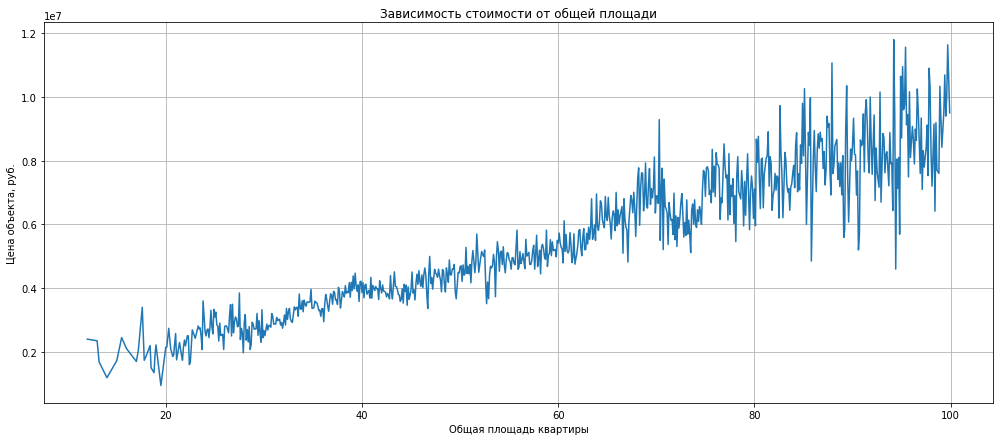

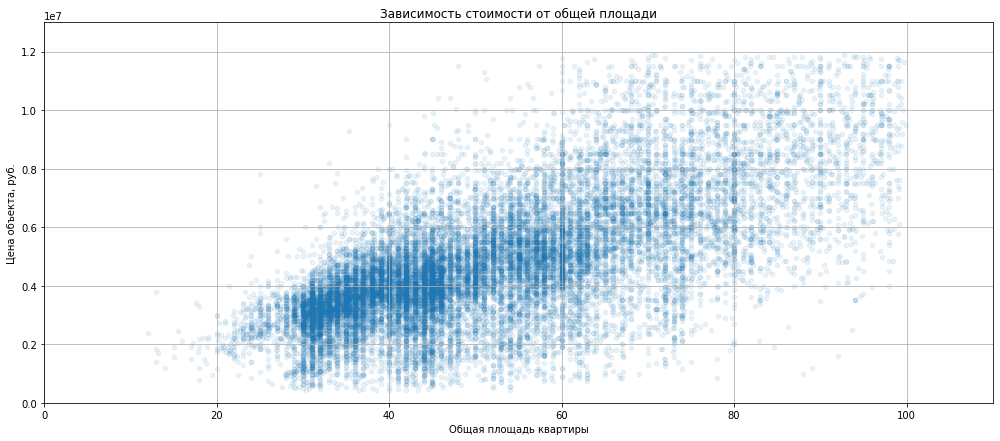

In [69]:
# Шаг 1: Группируем данные по 'total_area' и вычисляем среднюю цену 'last_price' для каждой общей площади
price_per_total_area = data_new.groupby('total_area')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от общей площади
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_total_area.index, price_per_total_area.values)  # Строим линейный график
plt.title('Зависимость стоимости от общей площади')  # Заголовок графика
plt.xlabel('Общая площадь квартиры')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'total_area' и 'last_price'
data_new.plot(
    x='total_area', 
    y='last_price', 
    kind='scatter', 
    alpha=0.09,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Общая площадь квартиры',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от общей площади'  # Заголовок графика
)
plt.xlim(0, 110)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

Можно отчетливо заметить, что чем больше по площади квартира, тем она дороже.

##### Зависит ли цена от жилой площади

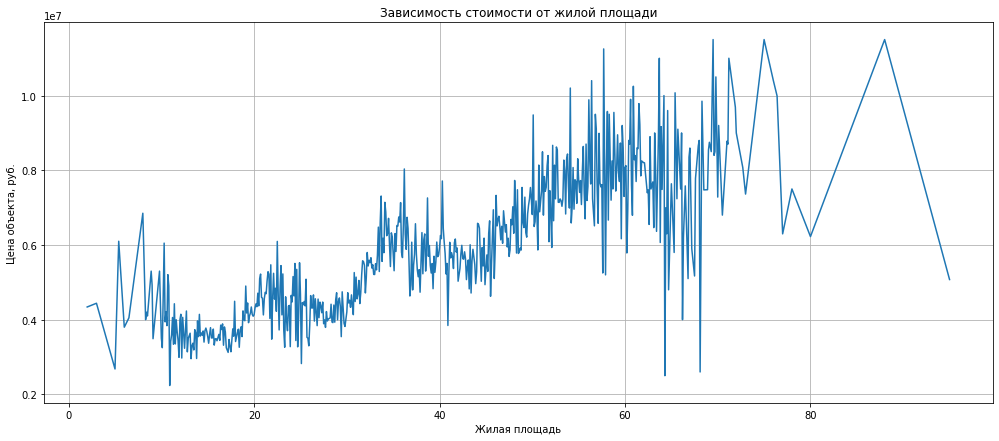

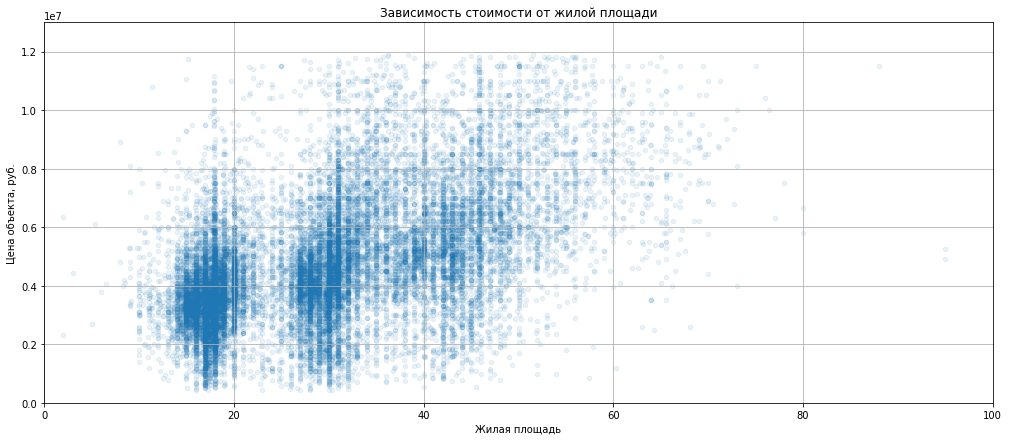

In [72]:
# Шаг 1: Группируем данные по 'living_area' и вычисляем среднюю цену 'last_price' для каждой жилой площади
price_per_living_area = data_new.groupby('living_area')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от жилой площади
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_living_area.index, price_per_living_area.values)  # Строим линейный график
plt.title('Зависимость стоимости от жилой площади')  # Заголовок графика
plt.xlabel('Жилая площадь')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'living_area' и 'last_price'
data_new.plot(
    x='living_area', 
    y='last_price', 
    kind='scatter', 
    alpha=0.09,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Жилая площадь',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от жилой площади'  # Заголовок графика
)
plt.xlim(0, 100)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

Так же видна зависимость чем больше жилая площадь, тем дороже квартира.

##### Зависит ли цена от площади кухни

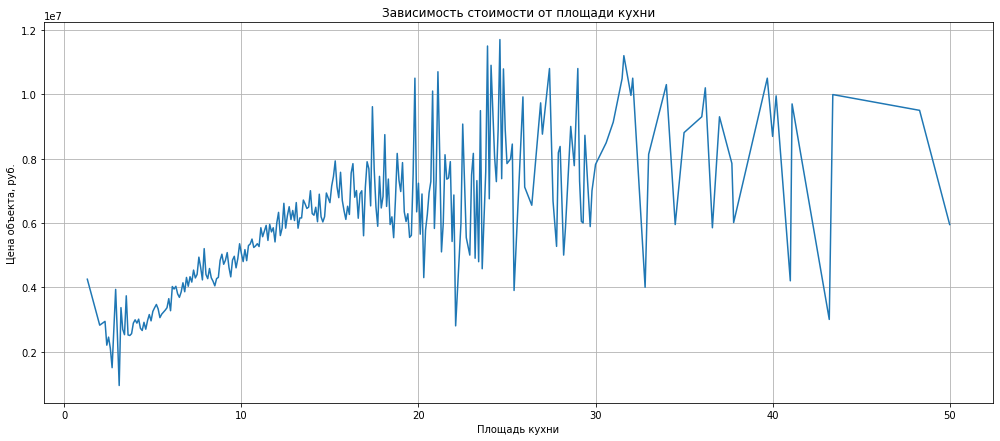

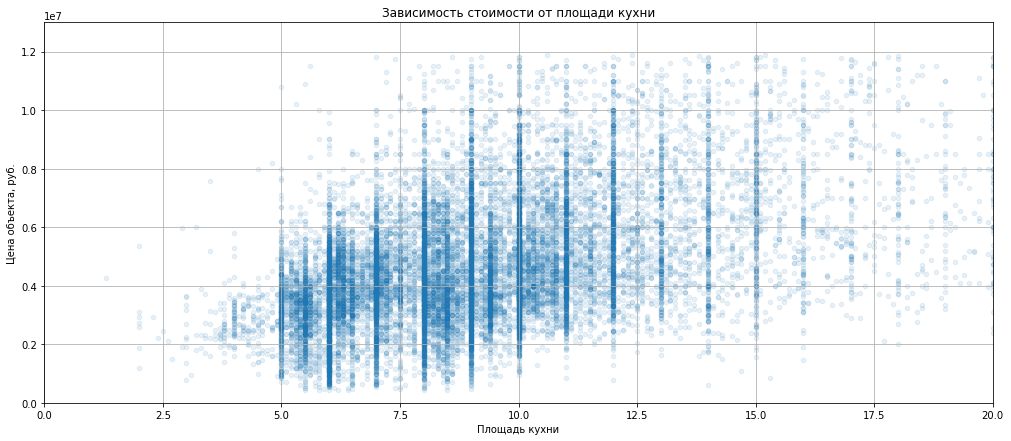

In [73]:
# Шаг 1: Группируем данные по 'kitchen_area' и вычисляем среднюю цену 'last_price' для каждой площади кухни
price_per_kitchen = data_new.groupby('kitchen_area')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от площади кухни
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_kitchen.index, price_per_kitchen.values)  # Строим линейный график
plt.title('Зависимость стоимости от площади кухни')  # Заголовок графика
plt.xlabel('Площадь кухни')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'kitchen_area' и 'last_price'
data_new.plot(
    x='kitchen_area', 
    y='last_price', 
    kind='scatter', 
    alpha=0.1,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Площадь кухни',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от площади кухни'  # Заголовок графика
)
plt.xlim(0, 20)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

Так же видна зависимость между площадью кухни и ценой квартиры. Однако в определенный момент площадь уже не так влияет на цену квартиры.

##### Зависит ли цена от количества комнат

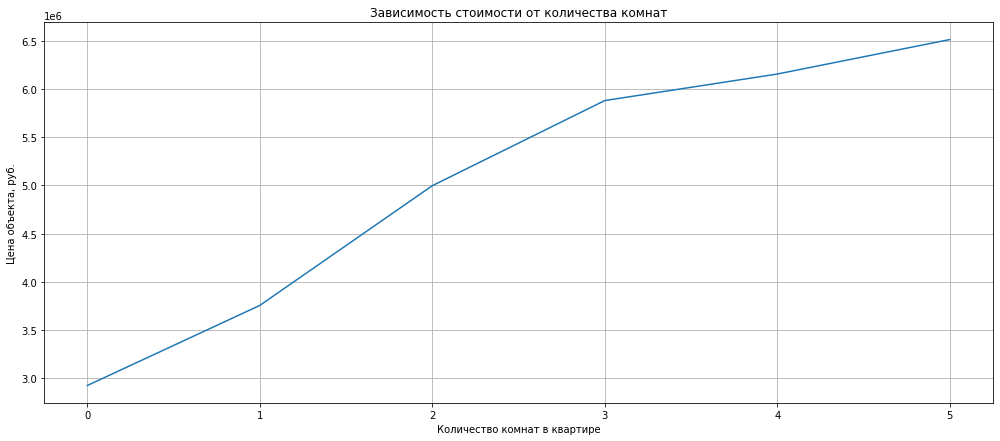

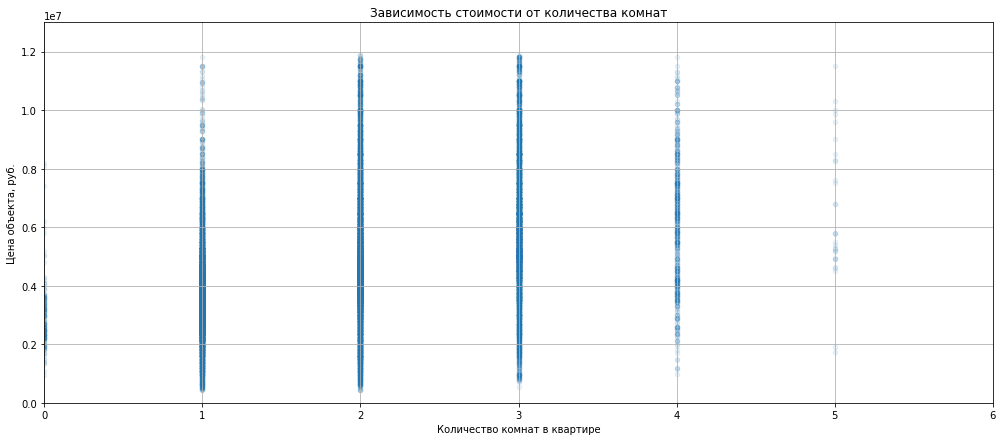

In [75]:
# Шаг 1: Группируем данные по 'rooms' и вычисляем среднюю цену 'last_price' для каждого количества комнат
price_per_rooms = data_new.groupby('rooms')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от количества комнат
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_rooms.index, price_per_rooms.values)  # Строим линейный график
plt.title('Зависимость стоимости от количества комнат')  # Заголовок графика
plt.xlabel('Количество комнат в квартире')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'rooms' и 'last_price'
data_new.plot(
    x='rooms', 
    y='last_price', 
    kind='scatter', 
    alpha=0.09,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Количество комнат в квартире',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от количества комнат'  # Заголовок графика
)
plt.xlim(0, 6)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

Очевидна зависимость цены от количества комнат и чем их больше, тем дороже квартира.

##### Зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)

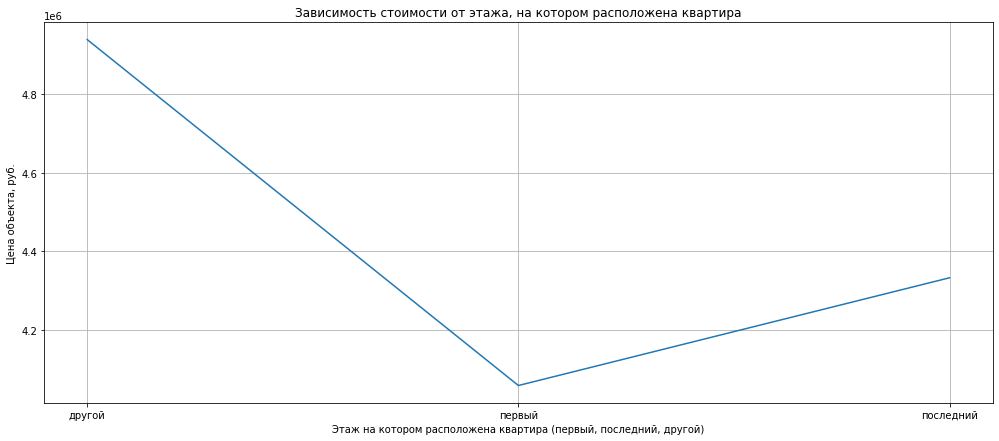

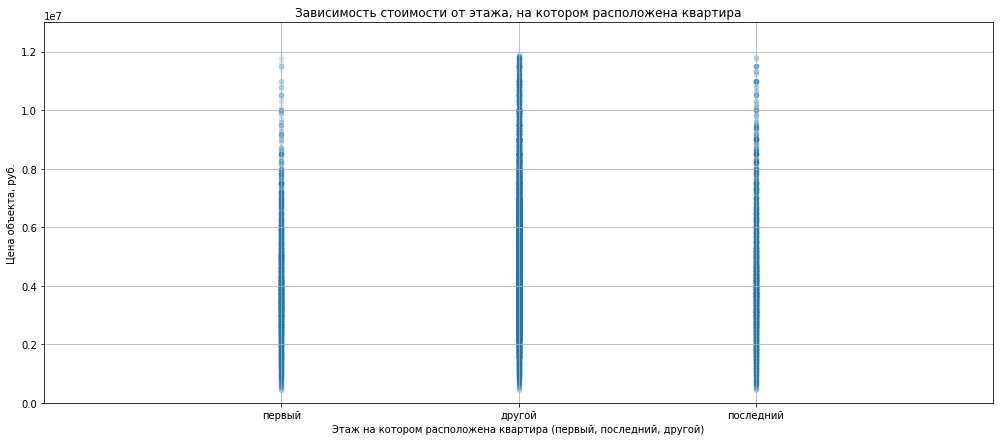

In [76]:
# Шаг 1: Группируем данные по 'apartment_floor_type' и вычисляем среднюю цену 'last_price' для каждого типа этажа
price_per_floor = data_new.groupby('apartment_floor_type')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от типа этажа
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_floor.index, price_per_floor.values)  # Строим линейный график
plt.title('Зависимость стоимости от этажа, на котором расположена квартира')  # Заголовок графика
plt.xlabel('Этаж на котором расположена квартира (первый, последний, другой)')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'apartment_floor_type' и 'last_price'
data_new.plot(
    x='apartment_floor_type', 
    y='last_price', 
    kind='scatter', 
    alpha=0.09,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Этаж на котором расположена квартира (первый, последний, другой)',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от этажа, на котором расположена квартира'  # Заголовок графика
)
plt.xlim(-1, 3)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

Квартиры на верхних этажах всегда более востребованы покупателями. Это касается как новостроек, так и старого жилого фонда. Покупатели готовы доплачивать за жилье на последних этажах: не слышно уличного шума, более чистый воздух, обилие солнечного света, отсутствие соседей сверху. Как утверждают эксперты с каждым этажом цена возрастает на 0,5%. Таким образом, самая высокая квартира в доме, по сравнению с аналогичным предложением на втором этаже, может стоить на 7,5-10% дороже. При этом в сегменте бизнес-класса разница в цене более ощутима, нежели в массовом сегменте. Отчасти это связано с тем, что застройщики размещают на верхних этажах очень интересные варианты квартир. Этим они подогревают спрос и цены.

##### Зависит ли цена от даты размещения (день недели, месяц, год)

###### Зависимость цены от дня размещения

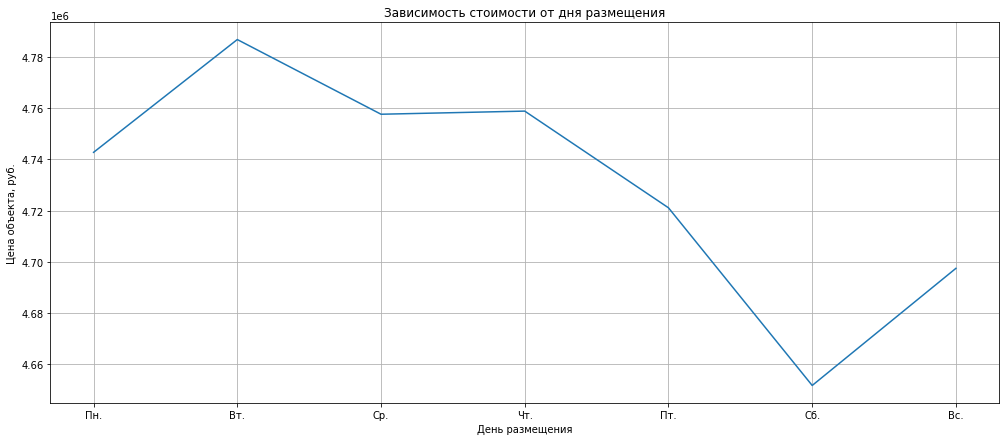

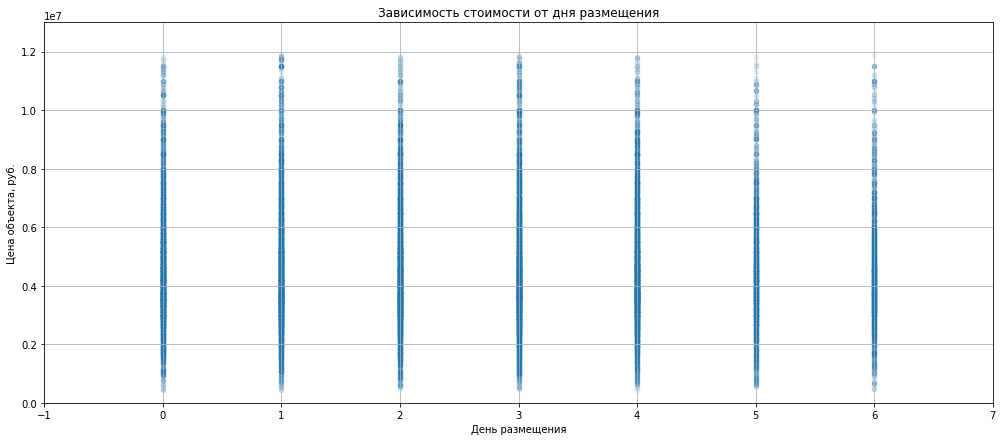

In [77]:
# Шаг 1: Группируем данные по 'day_of_the_publication_week' и вычисляем среднюю цену 'last_price' для каждого дня недели
price_per_day = data_new.groupby('day_of_the_publication_week')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от дня размещения
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_day.index, price_per_day.values)  # Строим линейный график
x_labels = ['Пн.', 'Вт.', 'Ср.', 'Чт.', 'Пт.', 'Сб.', 'Вс.']
plt.xticks(range(7), x_labels)  # Устанавливаем подписи для оси X
plt.title('Зависимость стоимости от дня размещения')  # Заголовок графика
plt.xlabel('День размещения')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'day_of_the_publication_week' и 'last_price'
data_new.plot(
    x='day_of_the_publication_week', 
    y='last_price', 
    kind='scatter', 
    alpha=0.09,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='День размещения',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от дня размещения'  # Заголовок графика
)
plt.xlim(-1, 7)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

Исходя из построенного графика можно сказать, что в субботу размещались объявления с самой низкой стоимостью, а во вторник с самой большой по стоимости квартиры.

###### Зависимость цены от месяца размещения

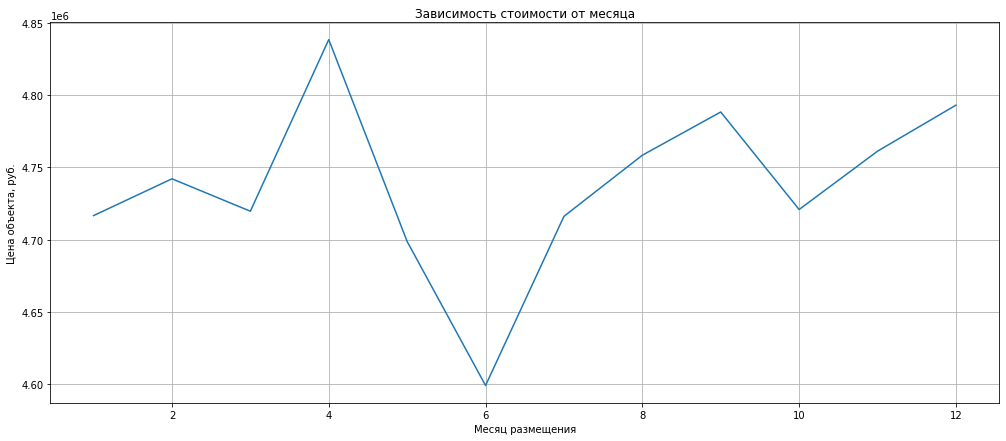

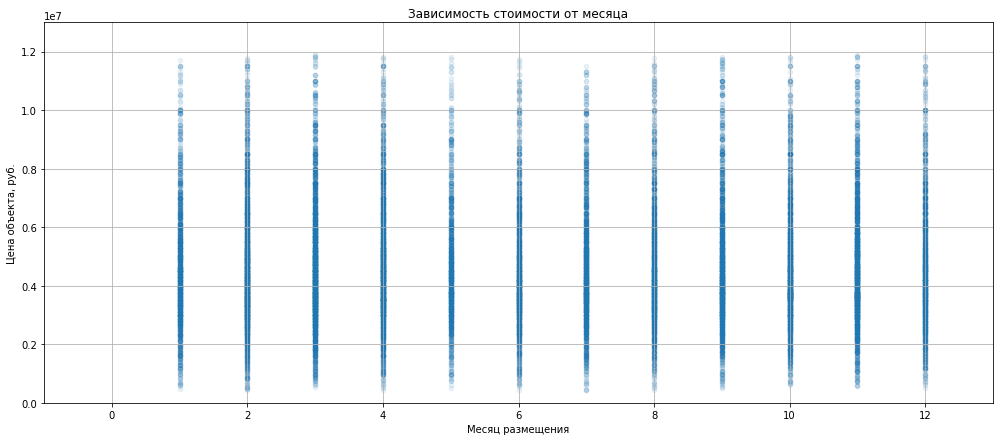

In [78]:
# Шаг 1: Группируем данные по 'month_of_publication' и вычисляем среднюю цену 'last_price' для каждого месяца
price_per_month = data_new.groupby('month_of_publication')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от месяца размещения
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_month.index, price_per_month.values)  # Строим линейный график
plt.title('Зависимость стоимости от месяца')  # Заголовок графика
plt.xlabel('Месяц размещения')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'month_of_publication' и 'last_price'
data_new.plot(
    x='month_of_publication', 
    y='last_price', 
    kind='scatter', 
    alpha=0.09,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Месяц размещения',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от месяца'  # Заголовок графика
)
plt.xlim(-1, 13)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

График демонстрирует, что в апреле, сентябре и декабре продавались самые дорогие квартиры, когда как в остальные месяца мы видим цену ниже. В июне самая низкая цена.

###### Зависимость цены от года размещения

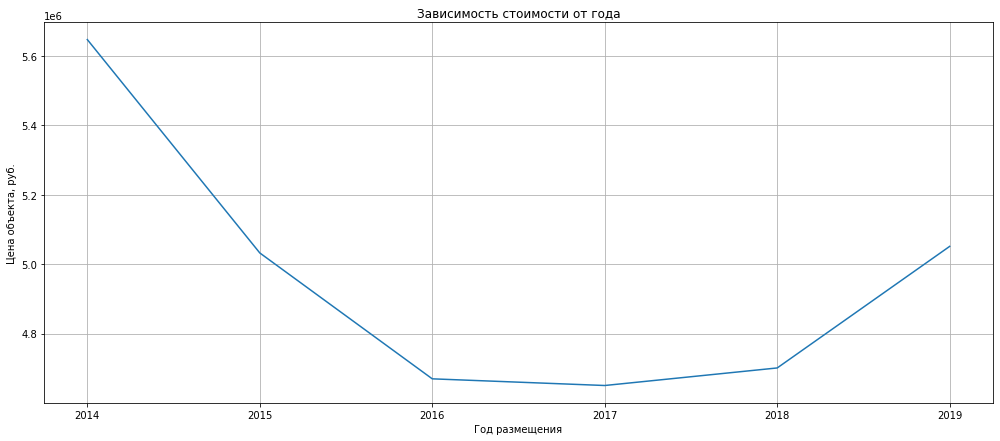

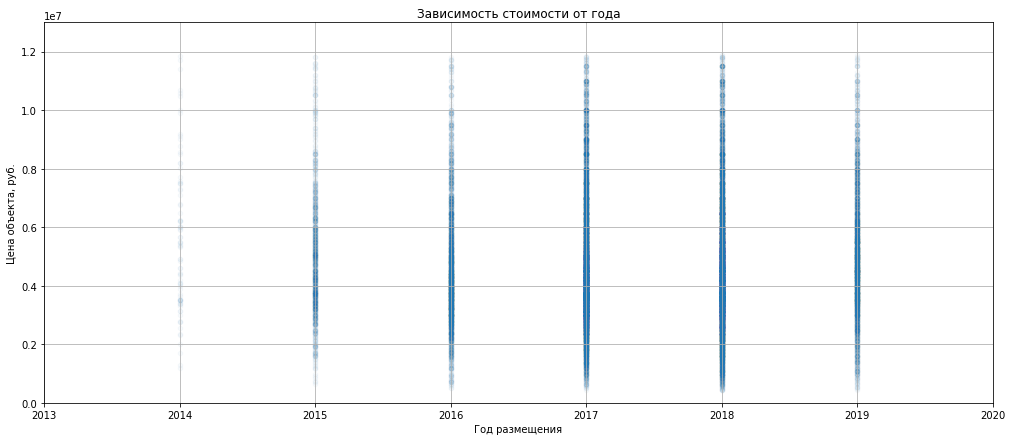

In [79]:
# Шаг 1: Группируем данные по 'year_of_publication' и вычисляем среднюю цену 'last_price' для каждого года
price_per_year = data_new.groupby('year_of_publication')['last_price'].mean()

# Шаг 2: Строим график зависимости стоимости от года размещения
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_year.index, price_per_year.values)  # Строим линейный график
plt.title('Зависимость стоимости от года')  # Заголовок графика
plt.xlabel('Год размещения')  # Подпись оси X
plt.ylabel('Цена объекта, руб.')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Строим диаграмму рассеяния для 'year_of_publication' и 'last_price'
data_new.plot(
    x='year_of_publication', 
    y='last_price', 
    kind='scatter', 
    alpha=0.03,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Год размещения',  # Подпись оси X
    ylabel='Цена объекта, руб.',  # Подпись оси Y
    title='Зависимость стоимости от года'  # Заголовок графика
)
plt.xlim(2013, 2020)  # Устанавливаем пределы для оси X
plt.ylim(0, 13000000)  # Устанавливаем пределы для оси Y
plt.show()  # Отображаем график диаграммы рассеяния

Отчетливо видно, как из года в год стоимость квартир падала вплоть до 2017 и вновь стала расти уже к 2018. Можно также отметить, что дорогие квартиры 2014 продавались вплоть до 2019 года! В то время как квартиры 2019 года уже продавались в среднем за месяц.

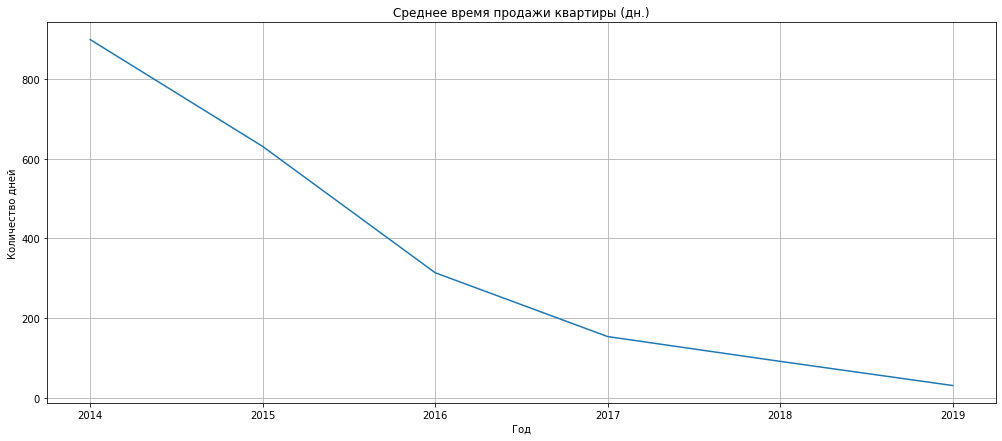

<AxesSubplot:xlabel='Год размещения', ylabel='Год продажи'>

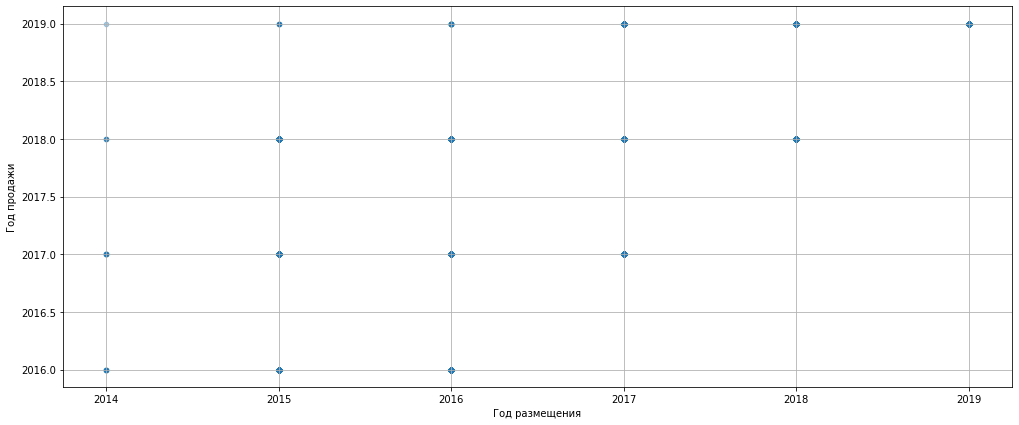

In [82]:
# Шаг 1: Группируем данные по 'year_of_publication' и вычисляем среднее время продажи 'days_exposition' для каждого года
year_of_publication_per_days_exposition = data_new.groupby('year_of_publication')['days_exposition'].mean()

# Шаг 2: Строим график среднего времени продажи квартиры по годам
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(year_of_publication_per_days_exposition.index, year_of_publication_per_days_exposition.values)  # Строим линейный график
plt.title('Среднее время продажи квартиры (дн.)')  # Заголовок графика
plt.xlabel('Год')  # Подпись оси X
plt.ylabel('Количество дней')  # Подпись оси Y
plt.show()  # Отображаем график

# Шаг 3: Преобразуем значения из столбца 'days_exposition' в тип timedelta
delta = pd.to_timedelta(data_new['days_exposition'], unit='d')

# Шаг 4: Добавляем timedelta к столбцу 'date' и извлекаем год продажи
data_new['last_year_exposition'] = (pd.to_datetime(data_new['first_day_exposition']) + delta).dt.year

# Шаг 5: Строим диаграмму рассеяния для 'year_of_publication' и 'last_year_exposition'
data_new.plot(
    x='year_of_publication', 
    y='last_year_exposition', 
    kind='scatter', 
    alpha=0.1,  # Устанавливаем прозрачность точек
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True,  # Включаем сетку на графике
    xlabel='Год размещения',  # Подпись оси X
    ylabel='Год продажи',  # Подпись оси Y
    title=''  # Убираем заголовок
)

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Средняя цена за квадратный метр в каждом населённом пункте: locality_name
всеволожск            67093.507812
выборг                58261.812500
гатчина               68680.476562
колпино               75321.984375
кудрово               95080.671875
мурино                86054.453125
поселок парголово     90495.921875
поселок шушары        78660.429688
пушкин               100593.804688
санкт-петербург      105994.593750
Name: price_of_one_square_meter, dtype: float32

Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург
Населённый пункт с самой низкой стоимостью квадратного метра: выборг


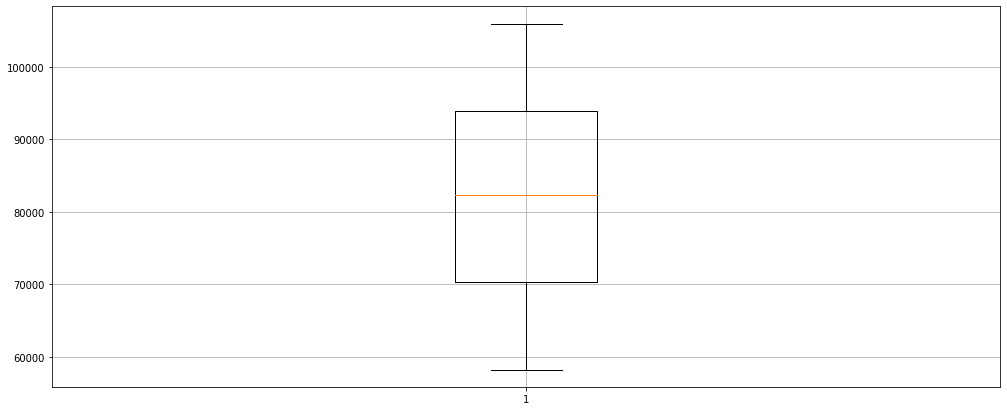

In [83]:
# Шаг 1: Фильтруем таблицу по населённым пунктам с наибольшим числом объявлений (top 10)
top_localities = data_new['locality_name'].value_counts().head(10).index
filtered_data = data_new[data_new['locality_name'].isin(top_localities)]

# Шаг 2: Рассчитываем среднюю цену за квадратный метр для каждого населённого пункта
price_per_sqm = filtered_data.groupby('locality_name')['price_of_one_square_meter'].mean()

# Шаг 3: Определяем населённые пункты с самой высокой и низкой стоимостью квадратного метра
max_price_locality = price_per_sqm.idxmax()
min_price_locality = price_per_sqm.idxmin()

# Выводим результаты
print("Средняя цена за квадратный метр в каждом населённом пункте:", price_per_sqm)

print()
print("Населённый пункт с самой высокой стоимостью квадратного метра:", max_price_locality)
print("Населённый пункт с самой низкой стоимостью квадратного метра:", min_price_locality)

# Шаг 4: Строим boxplot для распределения цен за квадратный метр в выбранных населённых пунктах
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.boxplot(price_per_sqm)  # Строим boxplot
plt.show()  # Отображаем график

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

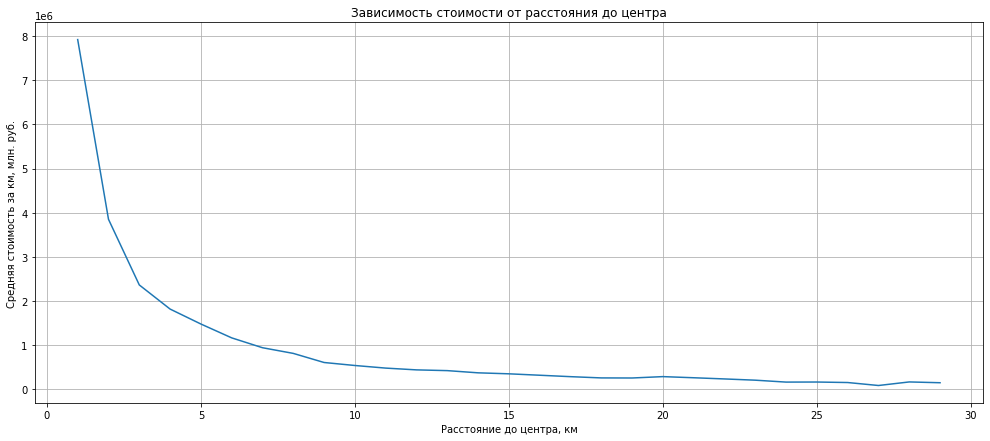

In [84]:
# Шаг 1: Фильтруем объявления только для Санкт-Петербурга и создаем копию данных
spb_flats = data_new.query('locality_name == "санкт-петербург"').copy()

# Шаг 2: Рассчитываем стоимость за каждый километр до центра города
spb_flats['price_per_km'] = spb_flats['last_price'] / spb_flats['cityCenters_nearest_km']

# Шаг 3: Группируем данные по расстоянию до центра и вычисляем среднюю стоимость за километр
price_per_km = spb_flats.groupby('cityCenters_nearest_km')['price_per_km'].mean()

# Шаг 4: Строим график зависимости средней стоимости за километр от расстояния до центра
plt.figure(figsize=(17, 7))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку на графике
plt.plot(price_per_km.index, price_per_km.values)  # Строим линейный график
plt.title('Зависимость стоимости от расстояния до центра')  # Заголовок графика
plt.xlabel('Расстояние до центра, км')  # Подпись оси X
plt.ylabel('Средняя стоимость за км, млн. руб.')  # Подпись оси Y
plt.show()  # Отображаем график

На графике можно заметить, что в центре города стоимость за квадратный метр намного выше, чем на окраинах. Это можно объяснить более высокой престижностью и удобством расположения жилья в центре, а также более высокой стоимостью земли и недвижимости в центральных районах города.

### Общий вывод

В результате анализа данной выборки можно сказать,что квартиры, которые чаще всего продаются на рынке недвижимости, имеют следующие характеристики:

- Общая площадь колеблется в пределах 30-70 кв. метров, что является наиболее распространенным размером жилья.
- Жилая площадь составляет 15-50 кв. метров, что позволяет жильцам комфортно проживать в одной или двух комнатах.
- Площадь кухни обычно составляет от 5 до 15 кв. метров, что также является стандартным размером для квартир.
- Цена квартир в большинстве случаев варьируется от 2 до 6 млн. рублей.
- Квартиры с одной комнатой являются наиболее популярными на рынке, за которыми следуют квартиры с двумя и тремя комнатами.
- Высота потолков в большинстве случаев составляет 2,5 метра.
- Квартиры, находящиеся на первых пяти этажах, наиболее популярны на рынке недвижимости.
- Большинство домов, представленных на рынке, имеют 5 или 9 этажей.
- Основная масса квартир продаются на расстоянии не более 20 км от центра города и в пределах от 10 до 55 км от ближайшего аэропорта.
- Квартиры, расположенные в пределах 750 метров от ближайшего парка, являются наиболее востребованными.
- Наибольшее количество объявлений о продаже квартир публикуется в феврале, марте, апреле и ноябре.
- Большинство объявлений о продаже квартир размещаются в будние дни с понедельника по пятницу.

Однако стоит отметить, что рынок недвижимости с 2014 по 2017 сильно просел по цене и начал восстанавливаться лишь спустя год. Шквал продаж пришелся на 2016 - 2018 годы и демонстрировал сильное падение средней цены на квадратный метр. Однако продажи в 2018 году, впервые с 2014 года, заставили расти цены на недвижимость. Данное обстоятельство может лишь свидетельствовать о крупном кризисе в экономике который оказал существенное влияние на рынок недвижимости в отдельно взятом регионе. Степень силы влияния кризиса в экономике очевидна и выражена влиянием на конкретный сектор на годы. Также видно, что в 2018 случилось оздоровление в экономике и это дало возможность роста цен. Очевидно, что самая показательная группа квартир служит маркером событий в экономике и может указывать на крупные системные процессы. Одновременно хочу заметить, что доминирующая часть квартир были сосредоточены в Санкт-Петербурге и являлись основной целью анализа.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод